# Prescribed vegetation cover
Preliminary results showed generally an off-set between observed and modelled vegetation cover. Here, vegetation cover derived from remote sensing (Donohue et al. 2008) is used as input for the VOM, and compared to the VOM-results that optimize the vegetation cover.

## Timeseries of vegetation cover

In [6]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [7]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

In [8]:
#read in fpar-data Donohue et al

fparv5_howard = np.loadtxt('../../data/fPAR/fpar_howard_v5.txt',delimiter=',', usecols=3 )
fparv5_adelaide = np.loadtxt('../../data/fPAR/fpar_adelaide_v5.txt',delimiter=',', usecols=3 )
fparv5_litch = np.loadtxt('../../data/fPAR/fpar_litchfield_v5.txt',delimiter=',', usecols=3 )
fparv5_daly = np.loadtxt('../../data/fPAR/fpar_daly_v5.txt',delimiter=',', usecols=3 )
fparv5_dry = np.loadtxt('../../data/fPAR/fpar_dry_v5.txt',delimiter=',', usecols=3 )
fparv5_sturt = np.loadtxt('../../data/fPAR/fpar_sturt_v5.txt',delimiter=',', usecols=3 )

fparv5_dates = np.genfromtxt('../../data/fPAR/dates_v5', dtype='str', delimiter=',')
fparv5_dates = pd.to_datetime(fparv5_dates[:,1], format="%Y%m")


In [15]:
#read in fpar MODIS
fpar_modis_howard = np.loadtxt('../../data/MODIS/fpar_howard.txt',delimiter=',', usecols=3 )
fpar_modis_adelaide = np.loadtxt('../../data/MODIS/fpar_adelaide.txt',delimiter=',', usecols=3 )
fpar_modis_daly = np.loadtxt('../../data/MODIS/fpar_daly.txt',delimiter=',', usecols=3 )
fpar_modis_dry = np.loadtxt('../../data/MODIS/fpar_dry.txt',delimiter=',', usecols=3 )
fpar_modis_sturt = np.loadtxt('../../data/MODIS/fpar_sturt.txt',delimiter=',', usecols=3 )

fpar_modis_dates = np.genfromtxt('../../data/MODIS/dates_fpar_modis', dtype='str', delimiter=',')
fpar_modis_dates = pd.to_datetime(fpar_modis_dates, format="%Y.%m.%d")


In [19]:
#read in evi MODIS
evi_modis_howard = np.loadtxt('../../data/MODIS/evi_howard.txt')
evi_modis_adelaide = np.loadtxt('../../data/MODIS/evi_adelaide.txt' )
evi_modis_daly = np.loadtxt('../../data/MODIS/evi_daly.txt')
evi_modis_dry = np.loadtxt('../../data/MODIS/evi_dry.txt' )
evi_modis_sturt = np.loadtxt('../../data/MODIS/evi_sturt.txt')

evi_modis_dates = np.genfromtxt('../../data/MODIS/dates_modis', dtype='str', delimiter=',')
evi_modis_dates = pd.to_datetime(evi_modis_dates, format="%Y.%m.%d")


In [28]:
#read in pc vegmachine
#bare_mean,green_mean,non_green_mean
vegmachine_howard =  pd.read_csv('../../data/vegmachine/howardsprings.csv', header=0, index_col=0)
vegmachine_adelaide =  pd.read_csv('../../data/vegmachine/adelaideriver.csv', header=0, index_col=0)
vegmachine_daly =  pd.read_csv('../../data/vegmachine/dalyuncleared.csv', header=0, index_col=0)
vegmachine_dry = pd.read_csv('../../data/vegmachine/dryriver.csv' , header=0, index_col=0)
vegmachine_sturt =  pd.read_csv('../../data/vegmachine/sturtplains.csv', header=0, index_col=0)
vegmachine_litch =  pd.read_csv('../../data/vegmachine/litchfield.csv', header=0, index_col=0)

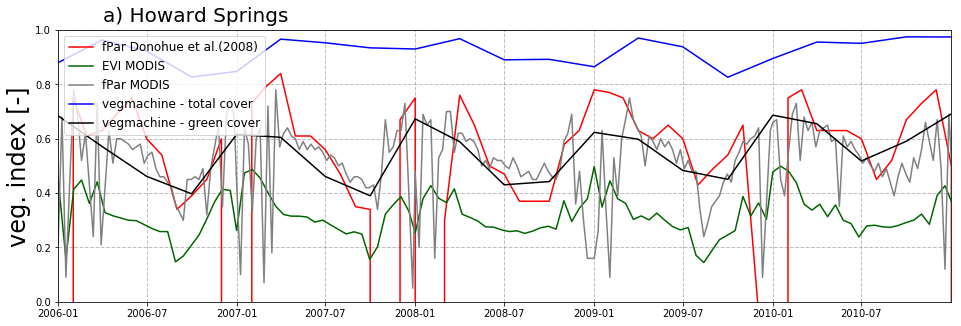

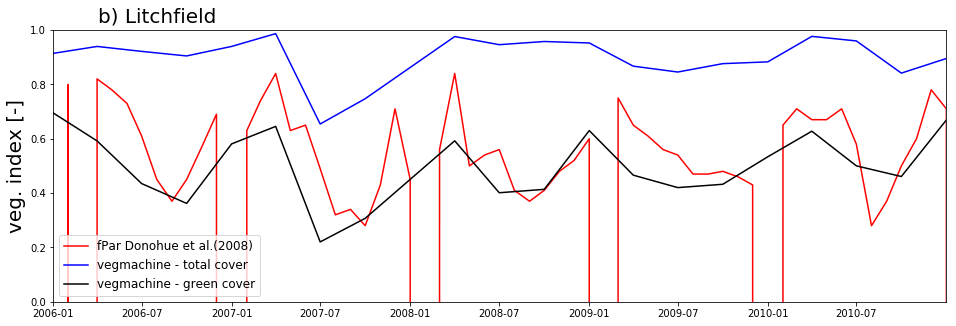

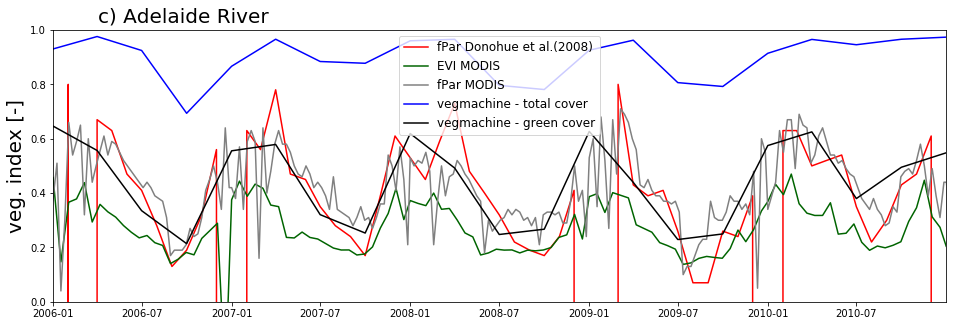

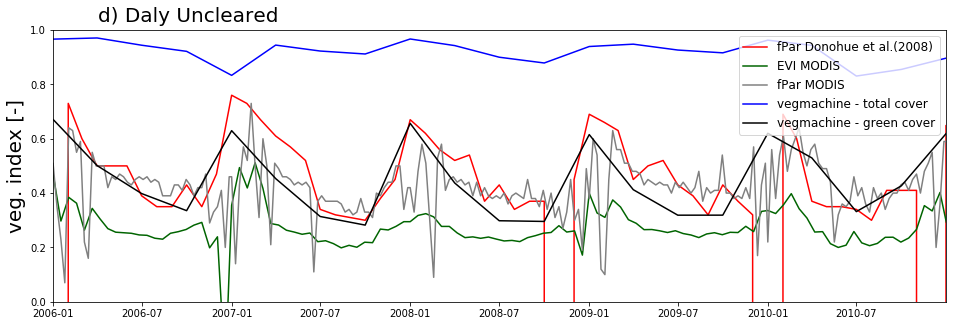

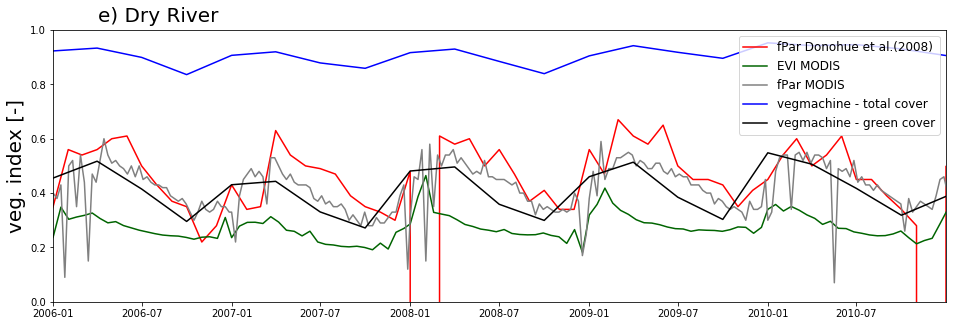

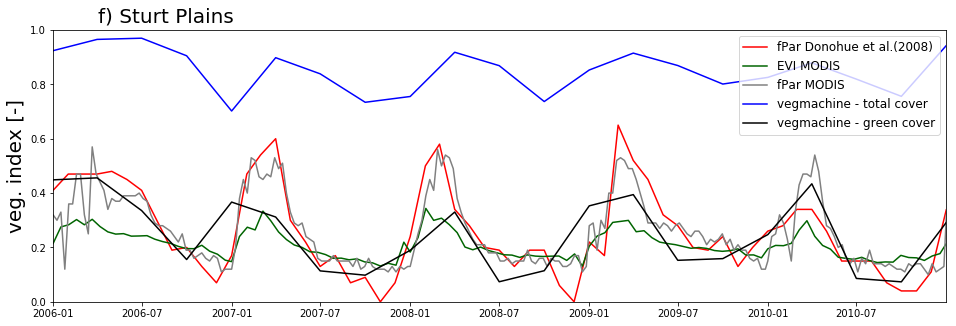

In [95]:
#howardsprings
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))    
ax.plot(fparv5_dates, fparv5_howard, color="red", label="fPar Donohue et al.(2008)")
ax.plot(evi_modis_dates, evi_modis_howard*0.0001, color="darkgreen", label="EVI MODIS")
ax.plot(fpar_modis_dates, fpar_modis_howard/100, color="grey", label="fPar MODIS")
ax.plot(pd.to_datetime(vegmachine_howard.index, format="%Y-%m")[np.isfinite(vegmachine_howard["green_mean"])], ((vegmachine_howard["green_mean"]+vegmachine_howard["non_green_mean"])/100)[np.isfinite(vegmachine_howard["green_mean"])], color="blue", label="vegmachine - total cover")
ax.plot(pd.to_datetime(vegmachine_howard.index, format="%Y-%m")[np.isfinite(vegmachine_howard["green_mean"])], ((vegmachine_howard["green_mean"])/100)[np.isfinite(vegmachine_howard["green_mean"])], color="black", label="vegmachine - green cover")

ax.set_ylabel("veg. index [-]", fontsize=24)
ax.set_xlim([datetime(2006,1, 1), datetime( 2010 ,12, 31)]) 
#for tick in ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(20)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(20)
ax.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)   
ax.set_ylim([0,1])
ax.text(0.05, 1.05, "a) Howard Springs", ha='left', va='center', fontsize=20, transform=ax.transAxes)
plt.legend(fontsize=12)

#Litchfield
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(fparv5_dates, fparv5_litch, color="red", label="fPar Donohue et al.(2008)")
ax.plot(pd.to_datetime(vegmachine_litch.index, format="%Y-%m")[np.isfinite(vegmachine_litch["green_mean"])], ((vegmachine_litch["green_mean"]+vegmachine_litch["non_green_mean"])/100)[np.isfinite(vegmachine_litch["green_mean"])], color="blue", label="vegmachine - total cover")
ax.plot(pd.to_datetime(vegmachine_litch.index, format="%Y-%m")[np.isfinite(vegmachine_litch["green_mean"])], ((vegmachine_litch["green_mean"])/100)[np.isfinite(vegmachine_litch["green_mean"])], color="black", label="vegmachine - green cover")

ax.set_ylabel("veg. index [-]", fontsize=20)
ax.set_xlim([datetime(2006,1, 1), datetime( 2010 ,12, 31)]) 
ax.set_ylim([0,1])
ax.text(0.05, 1.05, "b) Litchfield", ha='left', va='center', fontsize=20,transform=ax.transAxes)
plt.legend(fontsize=12)

#AdelaideRiver
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(fparv5_dates, fparv5_adelaide, color="red", label="fPar Donohue et al.(2008)")
ax.plot(evi_modis_dates, evi_modis_adelaide*0.0001, color="darkgreen", label="EVI MODIS")
ax.plot(fpar_modis_dates, fpar_modis_adelaide/100, color="grey", label="fPar MODIS")
ax.plot(pd.to_datetime(vegmachine_adelaide.index, format="%Y-%m")[np.isfinite(vegmachine_adelaide["green_mean"])], ((vegmachine_adelaide["green_mean"]+vegmachine_adelaide["non_green_mean"])/100)[np.isfinite(vegmachine_adelaide["green_mean"])], color="blue", label="vegmachine - total cover")
ax.plot(pd.to_datetime(vegmachine_adelaide.index, format="%Y-%m")[np.isfinite(vegmachine_adelaide["green_mean"])], ((vegmachine_adelaide["green_mean"])/100)[np.isfinite(vegmachine_adelaide["green_mean"])], color="black", label="vegmachine - green cover")

ax.set_ylabel("veg. index [-]", fontsize=20)
ax.set_xlim([datetime(2006,1, 1), datetime( 2010 ,12, 31)]) 

ax.set_ylim([0,1])
ax.text(0.05, 1.05, "c) Adelaide River", ha='left', va='center', fontsize=20,transform=ax.transAxes)
plt.legend(fontsize=12)


#DalyUncleared
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(fparv5_dates, fparv5_daly, color="red", label="fPar Donohue et al.(2008)")
ax.set_ylabel("veg. index [-]", fontsize=20)
ax.plot(evi_modis_dates, evi_modis_daly*0.0001, color="darkgreen", label="EVI MODIS")
ax.plot(fpar_modis_dates, fpar_modis_daly/100, color="grey", label="fPar MODIS")
ax.plot(pd.to_datetime(vegmachine_daly.index, format="%Y-%m")[np.isfinite(vegmachine_daly["green_mean"])], ((vegmachine_daly["green_mean"]+vegmachine_daly["non_green_mean"])/100)[np.isfinite(vegmachine_daly["green_mean"])], color="blue", label="vegmachine - total cover")
ax.plot(pd.to_datetime(vegmachine_daly.index, format="%Y-%m")[np.isfinite(vegmachine_daly["green_mean"])], ((vegmachine_daly["green_mean"])/100)[np.isfinite(vegmachine_daly["green_mean"])], color="black", label="vegmachine - green cover")

ax.set_xlim([datetime(2006,1, 1), datetime( 2010 ,12, 31)]) 

ax.set_ylim([0,1])
#ax.set_xlim([datetime(2007,1, 1), datetime( 2011 ,12, 31)]) 
ax.text(0.05, 1.05, "d) Daly Uncleared", ha='left', va='center', fontsize=20, transform=ax.transAxes)

plt.legend(fontsize=12)

#DryRiver
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(fparv5_dates, fparv5_dry, color="red", label="fPar Donohue et al.(2008)")
ax.plot(evi_modis_dates, evi_modis_dry*0.0001, color="darkgreen", label="EVI MODIS")
ax.plot(fpar_modis_dates, fpar_modis_dry/100, color="grey", label="fPar MODIS")
ax.plot(pd.to_datetime(vegmachine_dry.index, format="%Y-%m")[np.isfinite(vegmachine_dry["green_mean"])], ((vegmachine_dry["green_mean"]+vegmachine_dry["non_green_mean"])/100)[np.isfinite(vegmachine_dry["green_mean"])], color="blue", label="vegmachine - total cover")
ax.plot(pd.to_datetime(vegmachine_dry.index, format="%Y-%m")[np.isfinite(vegmachine_dry["green_mean"])], ((vegmachine_dry["green_mean"])/100)[np.isfinite(vegmachine_dry["green_mean"])], color="black", label="vegmachine - green cover")

ax.set_ylabel("veg. index [-]", fontsize=20)
ax.set_xlim([datetime(2006,1, 1), datetime( 2010 ,12, 31)]) 

ax.set_ylim([0,1])
#ax.set_xlim([datetime(2002,1, 1), datetime( 2006 ,12, 31)]) 
ax.text(0.05, 1.05, "e) Dry River", ha='left', va='center', fontsize=20,transform=ax.transAxes)
plt.legend(fontsize=12)

#SturtPlains
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))        
ax.plot(fparv5_dates, fparv5_sturt, color="red", label="fPar Donohue et al.(2008)")
ax.plot(evi_modis_dates, evi_modis_sturt*0.0001, color="darkgreen", label="EVI MODIS")
ax.plot(fpar_modis_dates, fpar_modis_sturt/100, color="grey", label="fPar MODIS")
ax.plot(pd.to_datetime(vegmachine_sturt.index, format="%Y-%m")[np.isfinite(vegmachine_sturt["green_mean"])], ((vegmachine_sturt["green_mean"]+vegmachine_sturt["non_green_mean"])/100)[np.isfinite(vegmachine_sturt["green_mean"])], color="blue", label="vegmachine - total cover")
ax.plot(pd.to_datetime(vegmachine_sturt.index, format="%Y-%m")[np.isfinite(vegmachine_sturt["green_mean"])], ((vegmachine_sturt["green_mean"])/100)[np.isfinite(vegmachine_sturt["green_mean"])], color="black", label="vegmachine - green cover")

ax.set_ylabel("veg. index [-]", fontsize=20)
ax.set_xlim([datetime(2006,1, 1), datetime( 2010 ,12, 31)]) 

ax.set_ylim([0,1])
ax.text(0.05, 1.05, "f) Sturt Plains", ha='left', va='center', fontsize=20,transform=ax.transAxes)
plt.legend(fontsize=12)
plt.show()


**Figure S4.1.** Constructed timeseries of vegetation cover used as input for the VOM with the actual values supplemented by the mean monthly values (blue), and just the mean monthly values (black),  which are based on the monthly mean values of fPar-based vegetation cover (Donohue et al., 2008) for a) Howard Springs, b) Litchfield, c) Adelaide River d) Daly Uncleared, e) Dry River and f) Sturt Plains. Observed fPar-based vegetation cover is shown in red. 

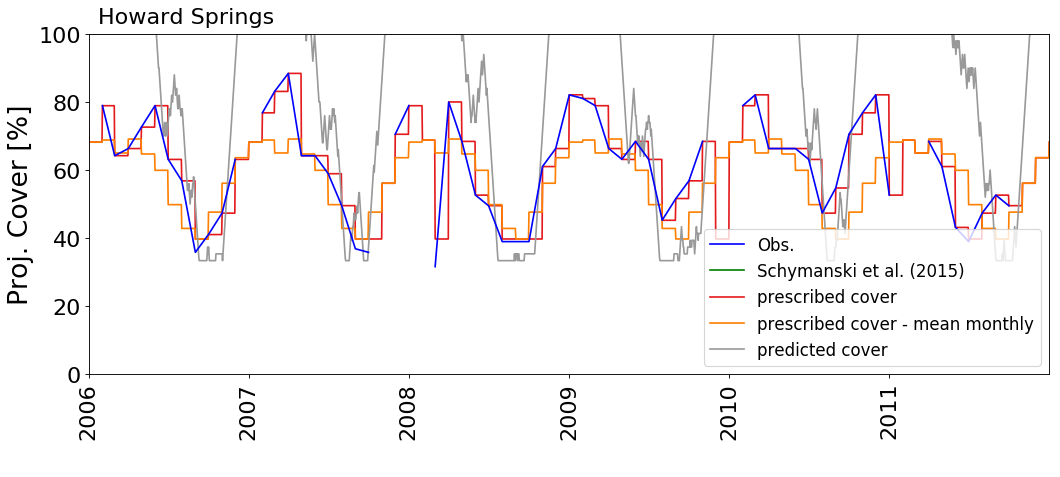

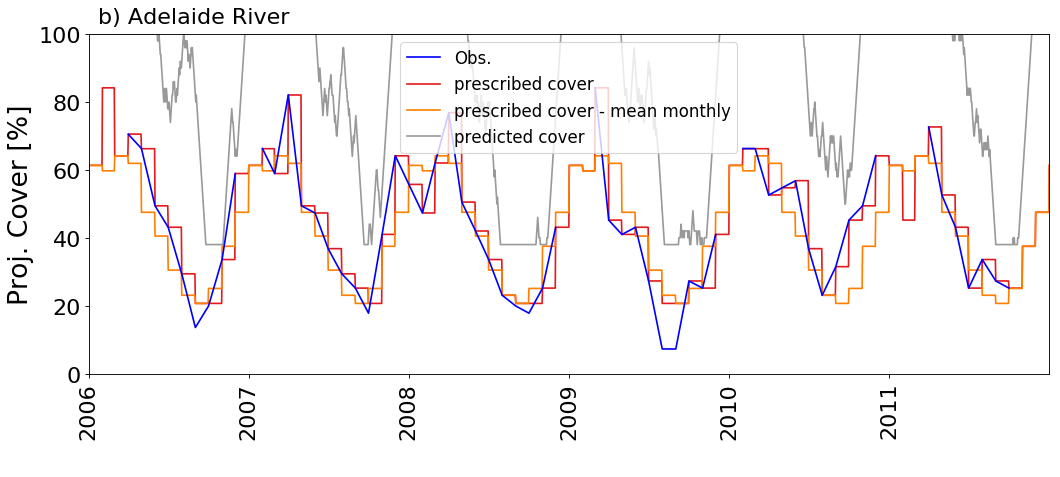

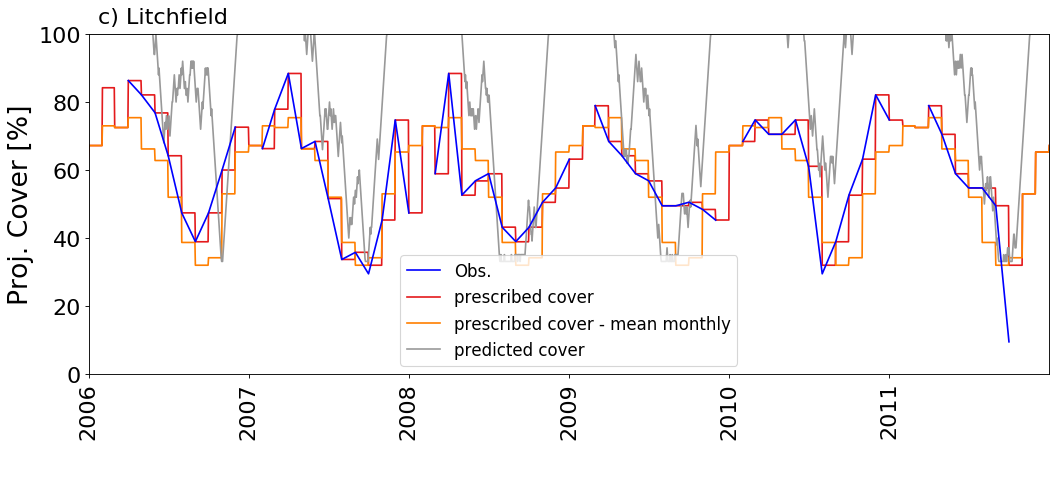

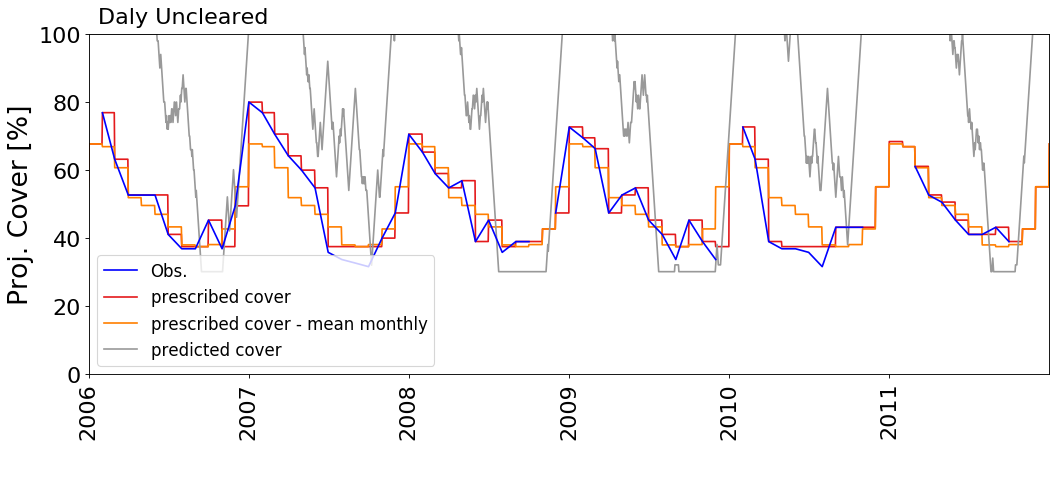

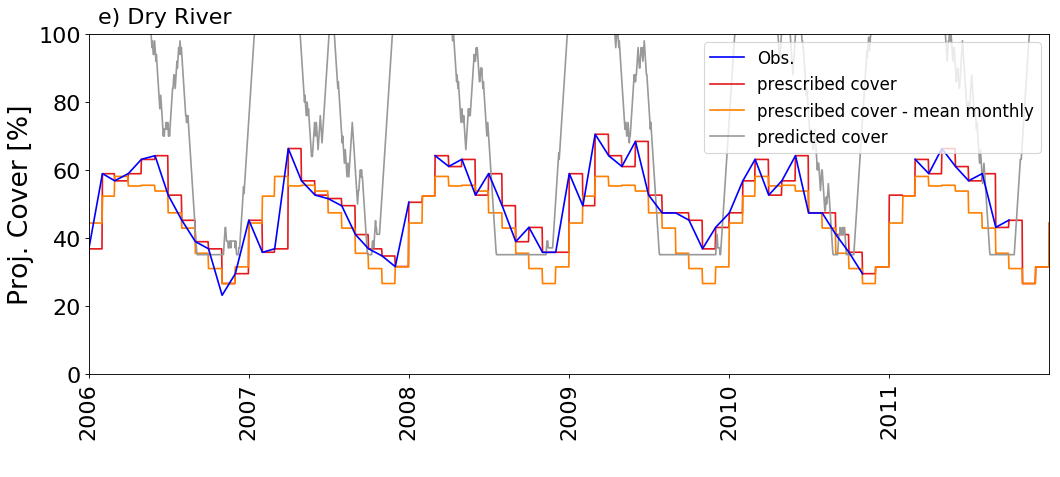

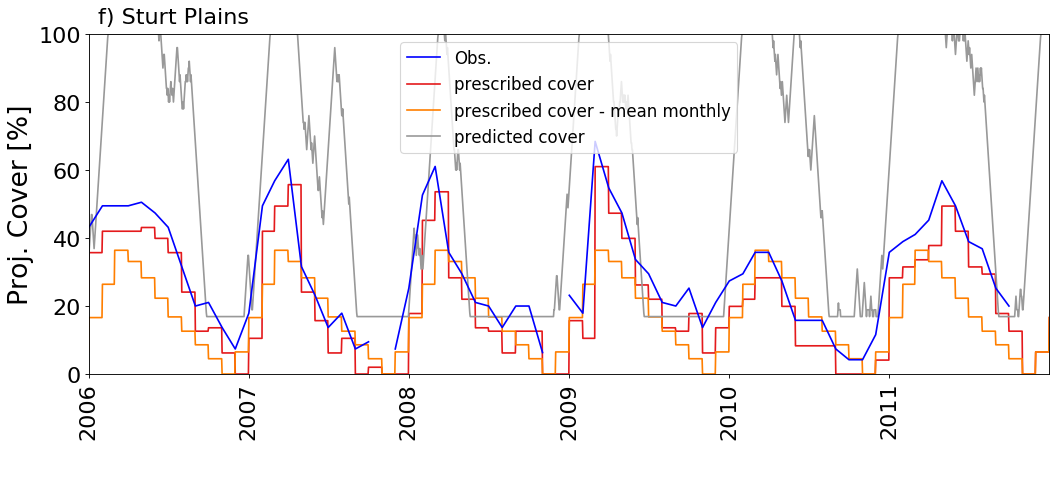

In [7]:
#HowardSprings
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v pc --var2015 pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--obs ../../data/fPAR/fpar_howard_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--title "Howard Springs" --legend True --palette Set1 \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"

#AdelaideRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_adelaide_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--title "b) Adelaide River" --legend True --palette Set1 \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"

#Litchfield
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_litchfield_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--title "c) Litchfield" --legend True --palette Set1 \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"

#DalyUncleared
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_daly_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--title "Daly Uncleared" --legend True --palette Set1 \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"

#DryRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_dry_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--title "e) Dry River" --legend True --palette Set1 \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"

#SturtPlains
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_sturt_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--title "f) Sturt Plains" --legend True --cbar_max 3.0 --palette Set1 \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"

## Timeseries of evaporation

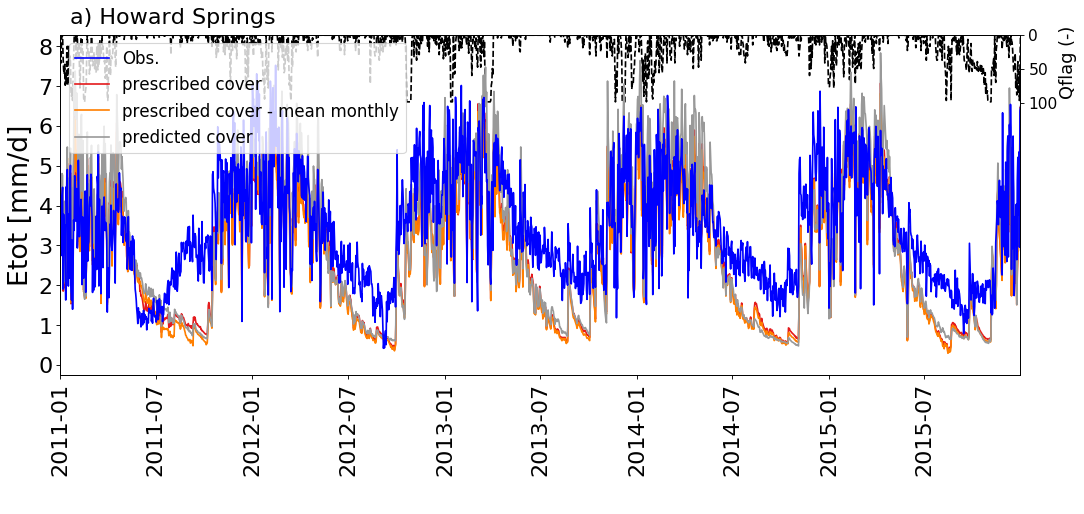

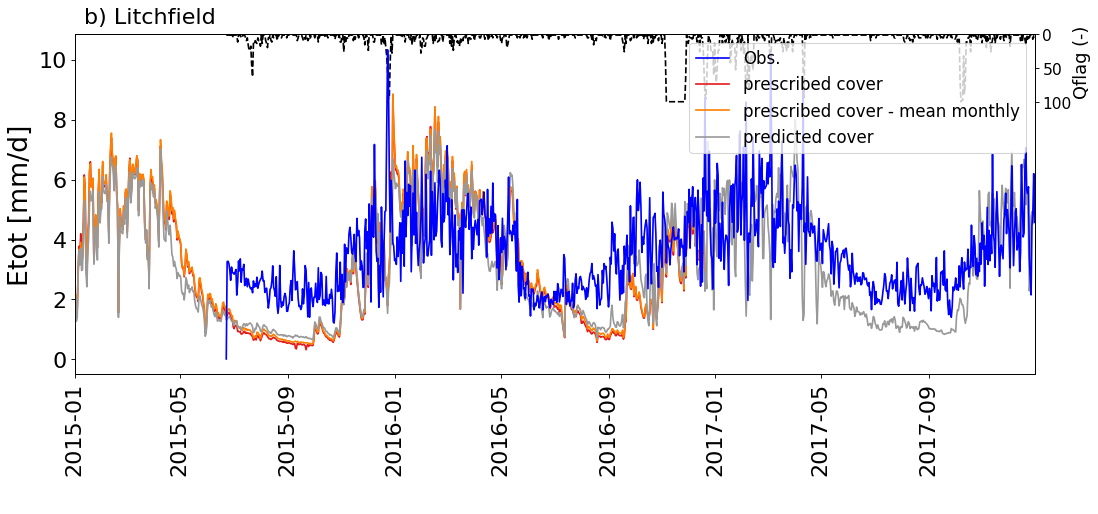

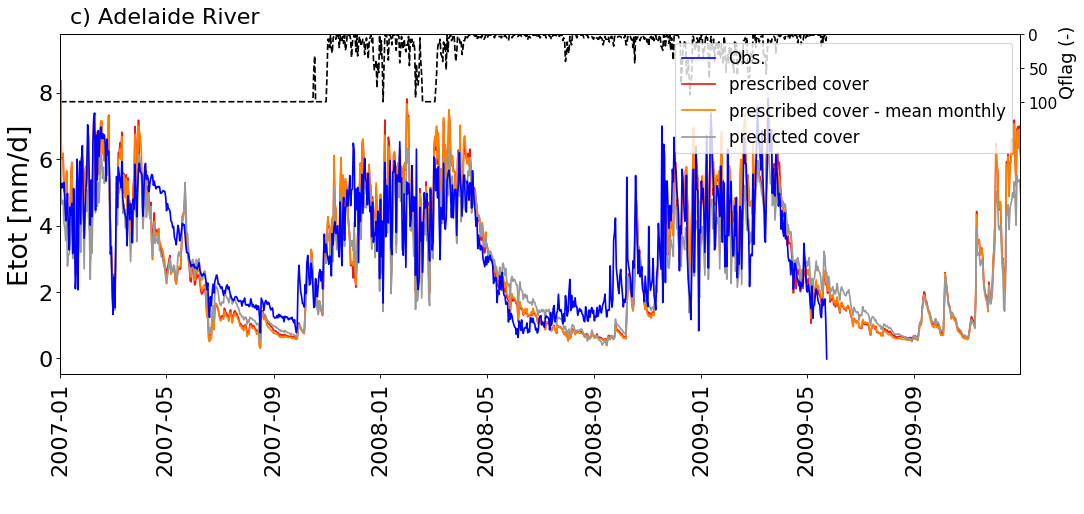

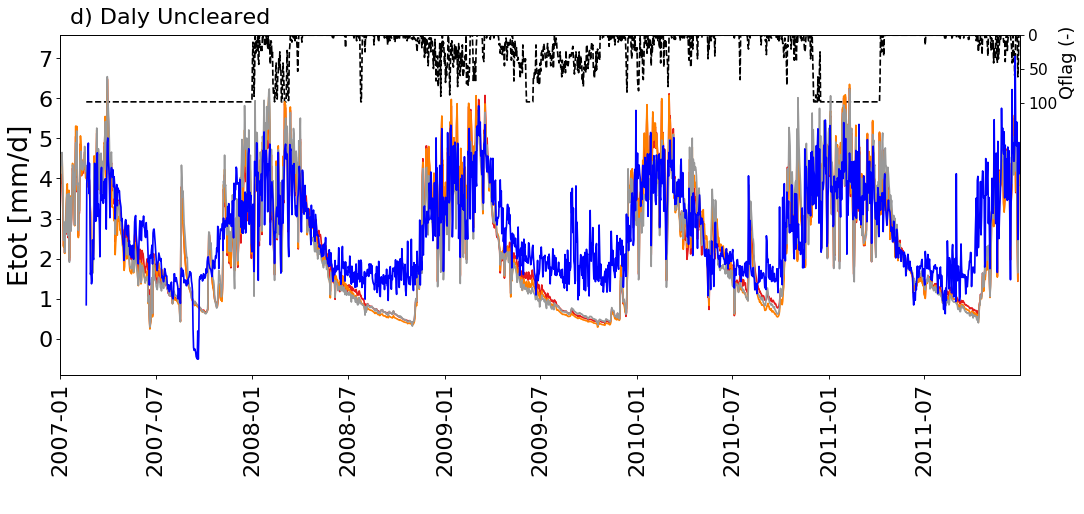

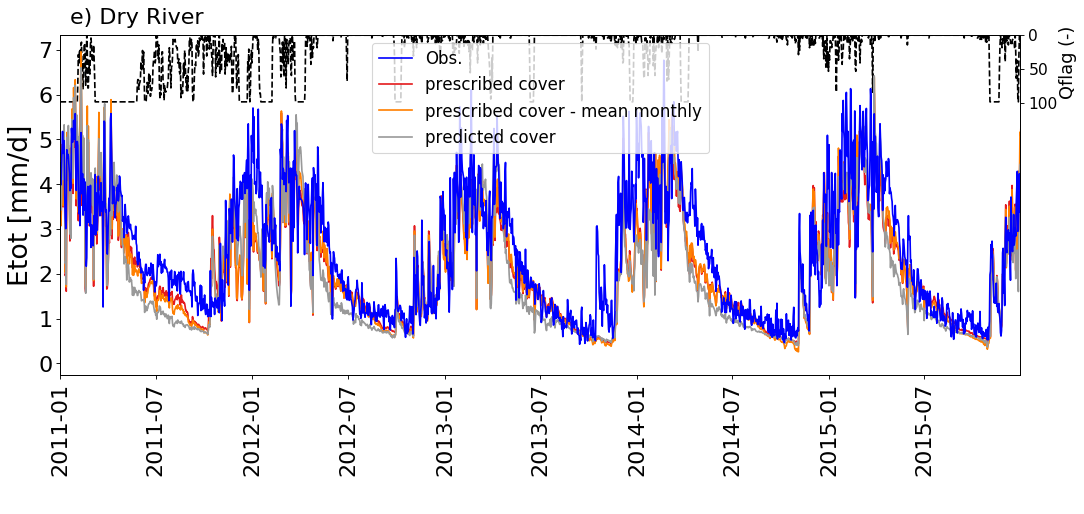

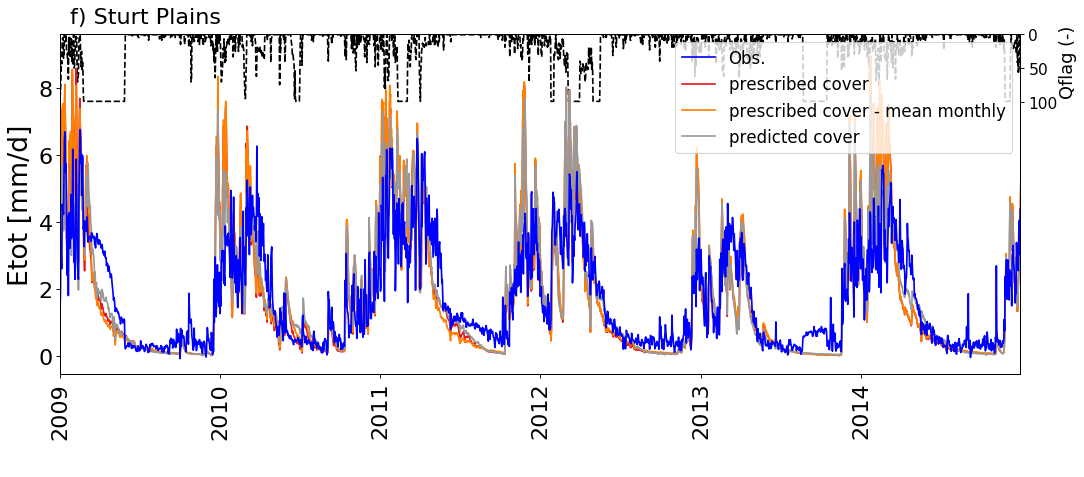

In [8]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "a) Howard Springs" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FeQ_howard.txt

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/Ea_litch.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "b) Litchfield" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FeQ_litch.txt

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_adelaide.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "c) Adelaide River" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FeQ_adelaide.txt

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/Ea_daly.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "d) Daly Uncleared"   \
--palette Set1 --obs_qc ../../data/DINGO_QC/FeQ_daly.txt

#DryRiver 
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_dry.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"  --title "e) Dry River" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FeQ_dry.txt

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/Ea_sturt.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "f) Sturt Plains" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FeQ_sturt.txt




**Figure S4.2.** Comparison of total evaporation for the VOM with prescribed cover (red), predicted cover (gray) and fluxtower observations (blue) for a) Howard Springs, b) Litchfield, c) Adelaide River d) Daly Uncleared, e) Dry River and f) Sturt Plains. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The results with prescribed vegetation cover are rather similar to the results that optimize vegetation cover. Generally, the VOM deviates a bit more from the observations when vegetation is predicted. 

### Transpiration trees

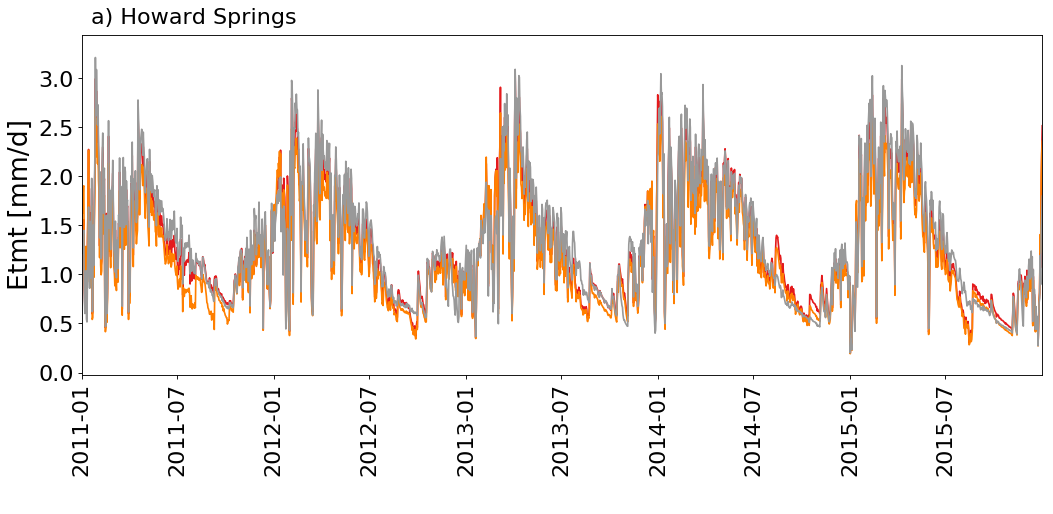

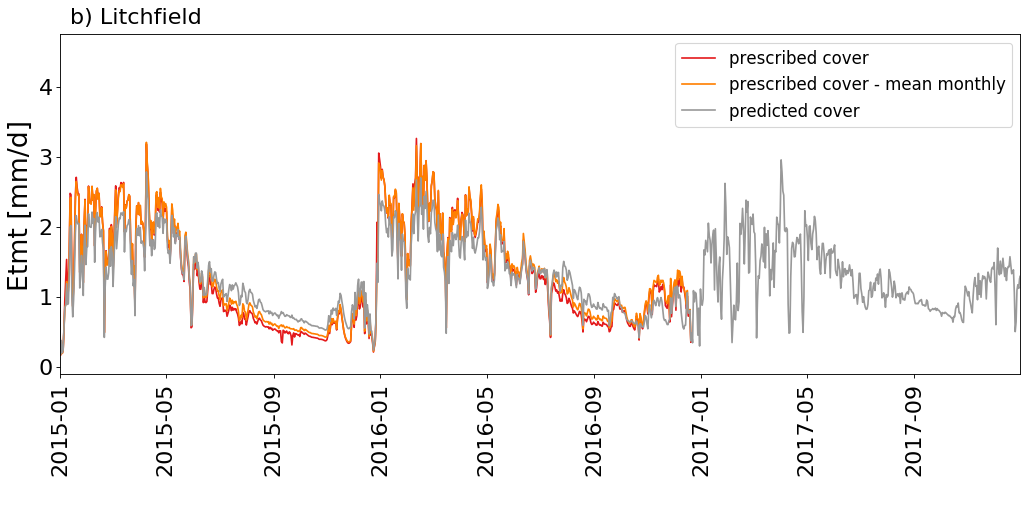

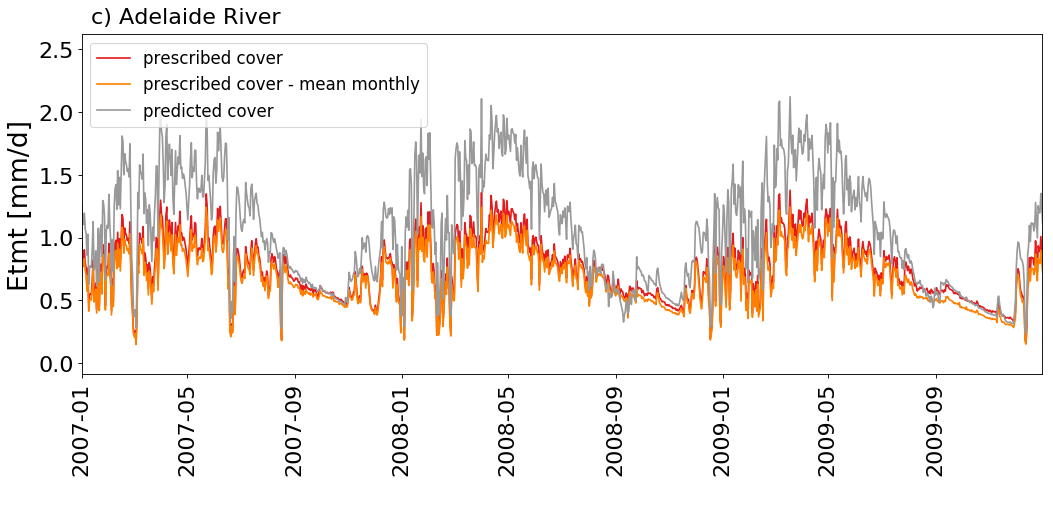

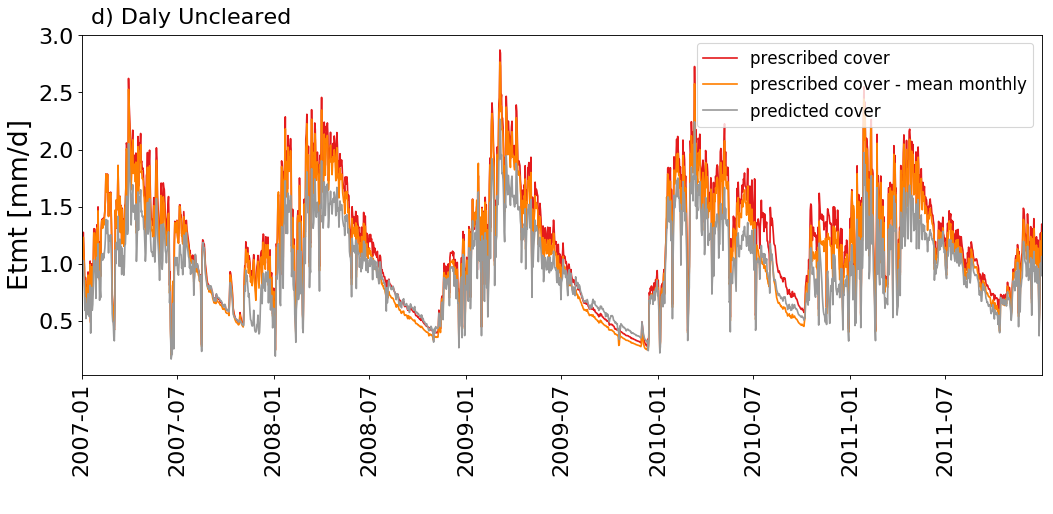

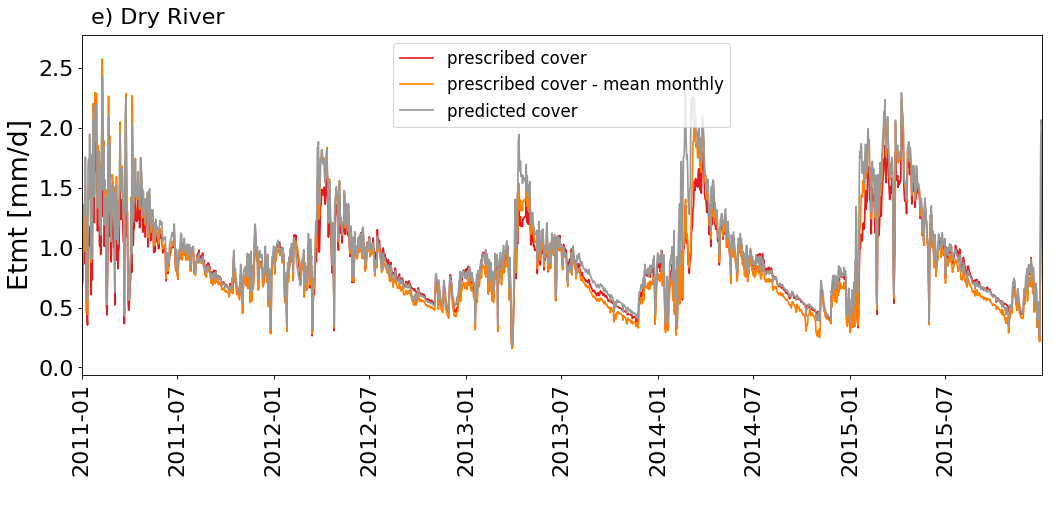

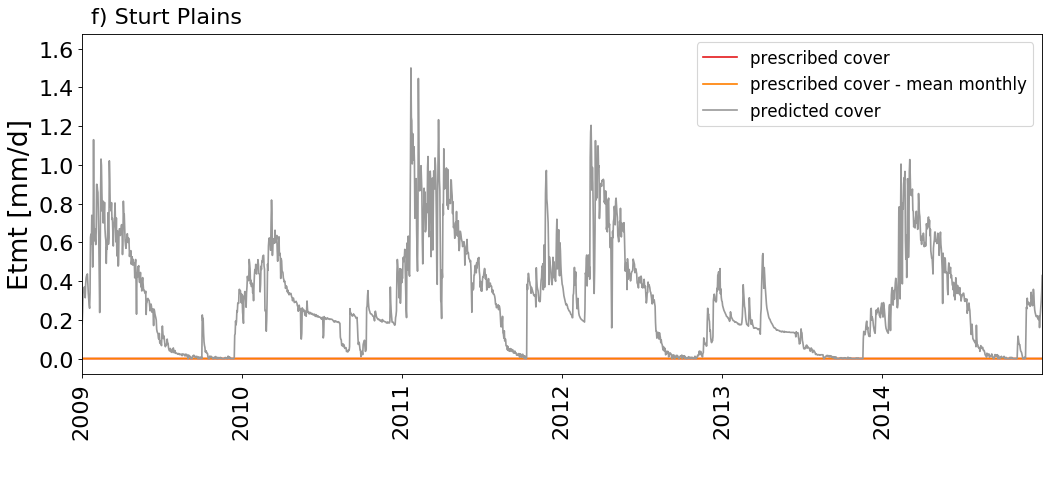

In [9]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v etmt -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "a) Howard Springs"   \
--palette Set1

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v etmt -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "b) Litchfield" --legend True  \
--palette Set1

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v etmt -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "c) Adelaide River" --legend True  \
--palette Set1


#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v etmt -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "d) Daly Uncleared" --legend True  \
--palette Set1

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v etmt -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "e) Dry River" --legend True  \
--palette Set1

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v etmt -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--mf 1000 --ylabel "Etmt [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "f) Sturt Plains" --legend True  \
--palette Set1




**Figure S4.3.** Transpiration of the perennial trees for prescribed cover (red) and predicted cover (gray) for a) Howard Springs, b) Litchfield, c) Adelaide River d) Daly Uncleared, e) Dry River and f) Sturt Plains. The transpiration of trees is generally lower in case of prescribed vegetation cover, for Sturt Plains there is no transpiration from the threes as the tree cover was set to 0. 

### Transpiration grasses

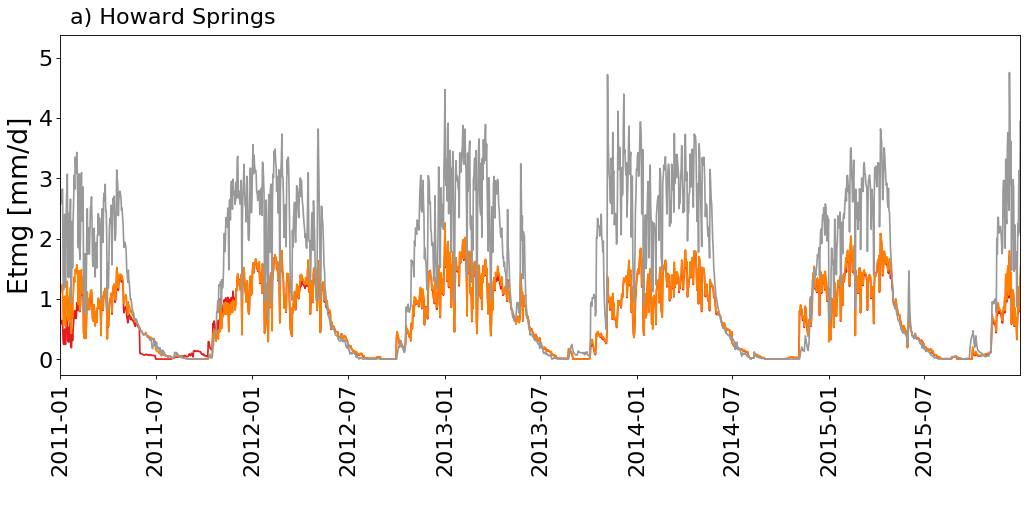

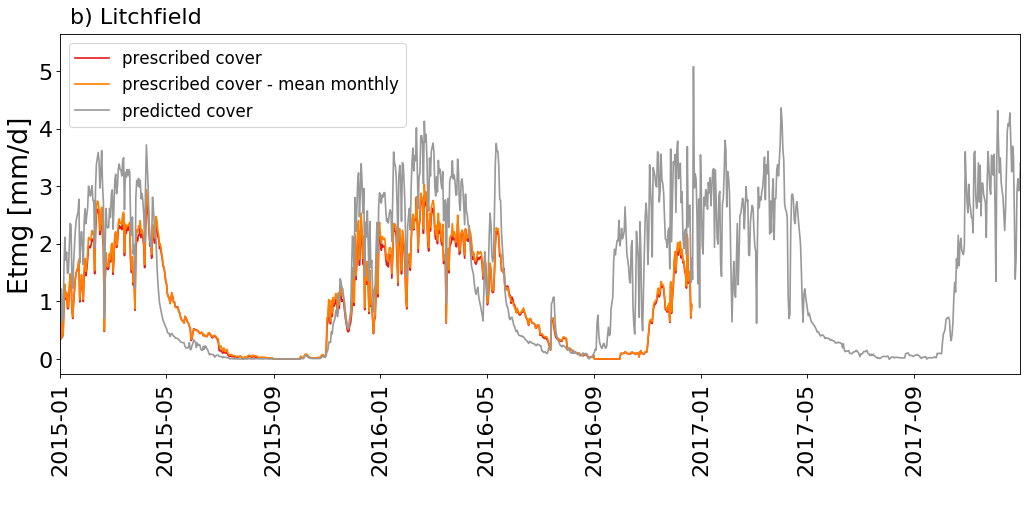

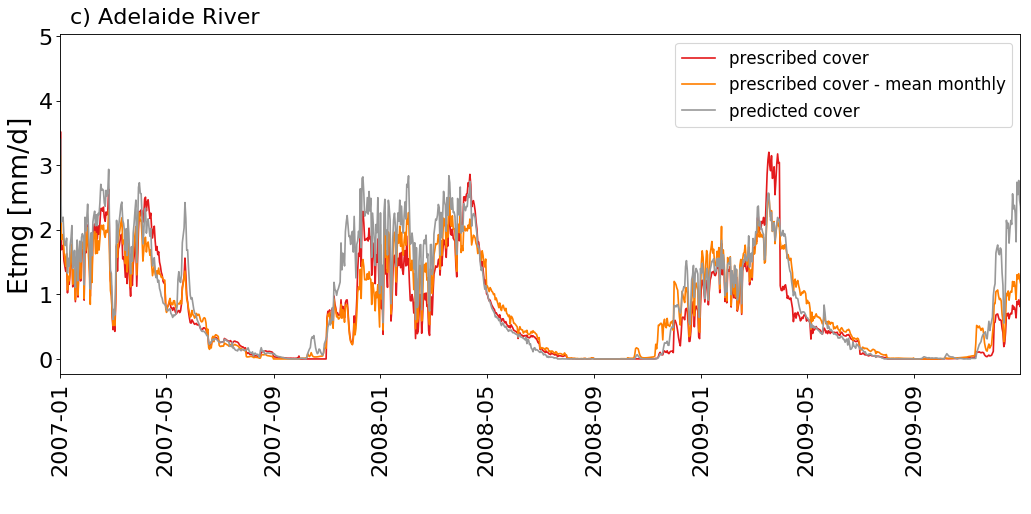

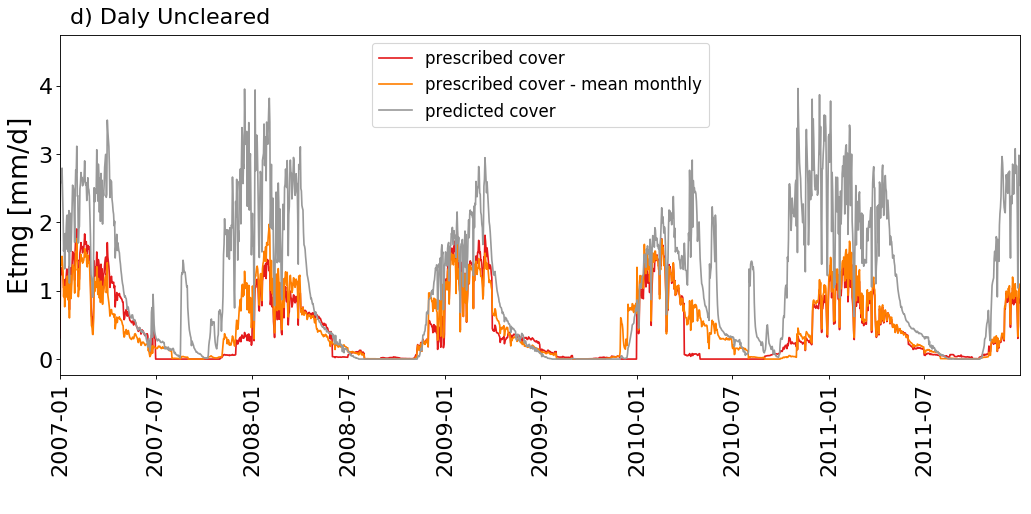

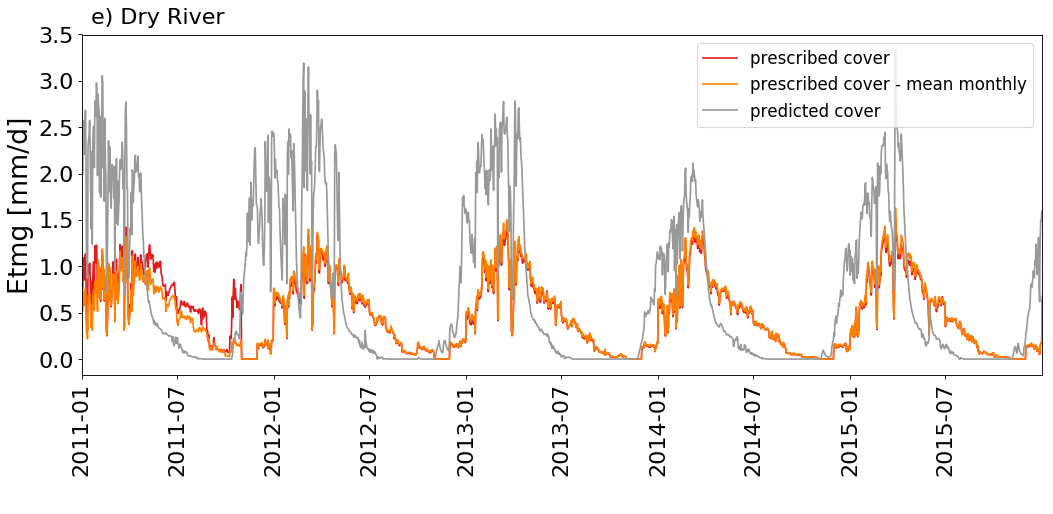

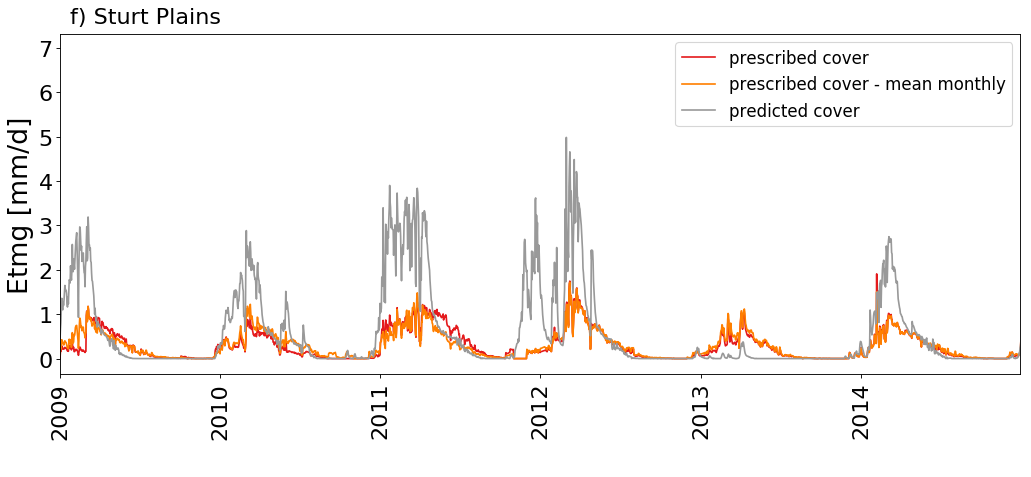

In [10]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v etmg -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "a) Howard Springs"  \
--palette Set1

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v etmg -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "b) Litchfield" --legend True  \
--palette Set1

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v etmg -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "c) Adelaide River" --legend True  \
--palette Set1



#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v etmg -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "d) Daly Uncleared" --legend True  \
--palette Set1

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v etmg -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "e) Dry River" --legend True  \
--palette Set1

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v etmg -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--mf 1000 --ylabel "Etmg [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "f) Sturt Plains" --legend True  \
--palette Set1




**Figure S4.4.** Transpiration of the seasonal grasses for prescribed cover (red) and predicted cover (gray) for a) Howard Springs, b) Litchfield, c) Adelaide River d) Daly Uncleared, e) Dry River and f) Sturt Plains.  The transpiration of grasses is generally lower in case of prescribed vegetation cover 

### Soil evaporation

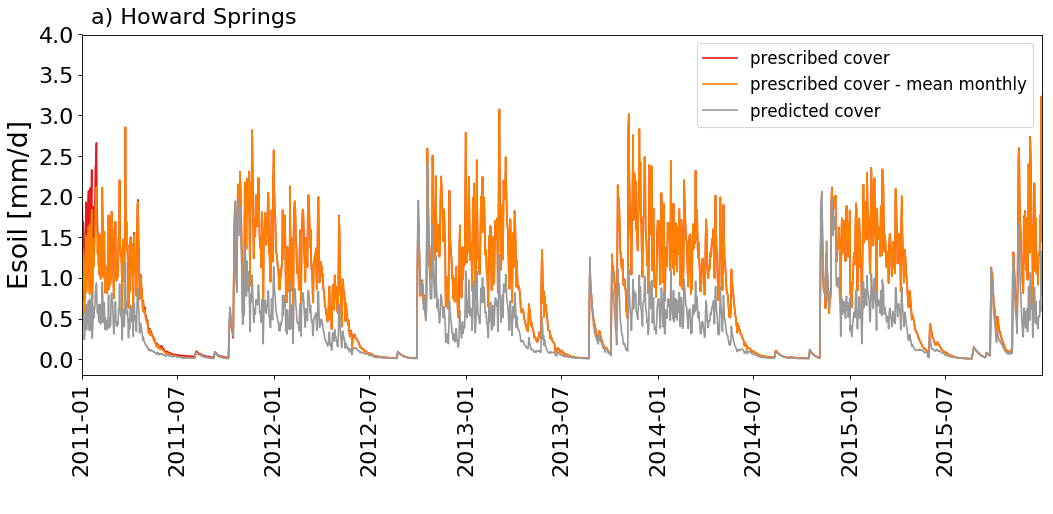

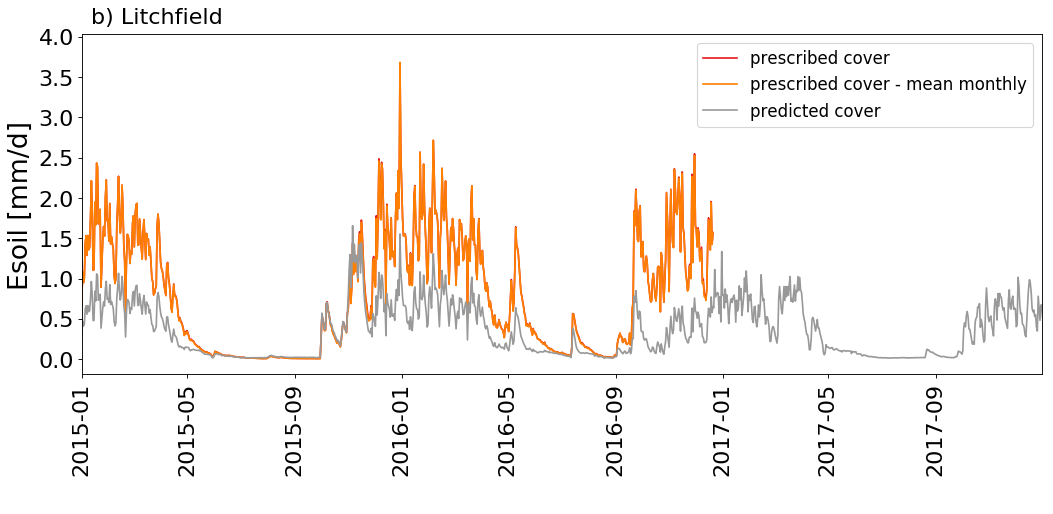

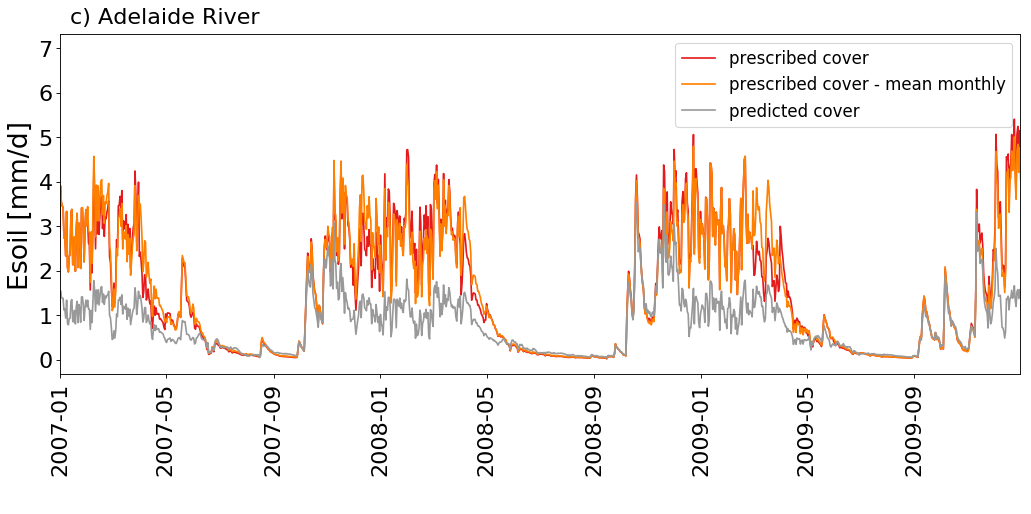

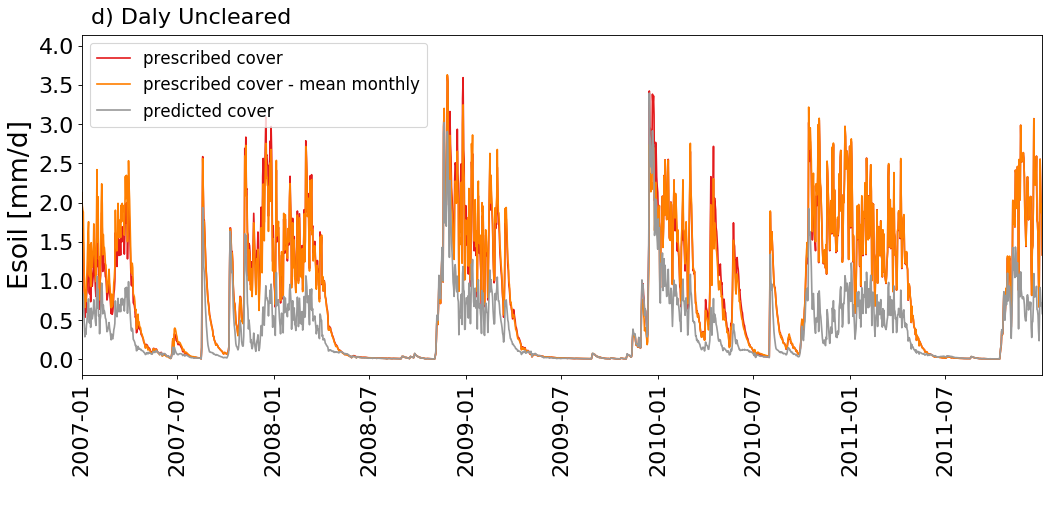

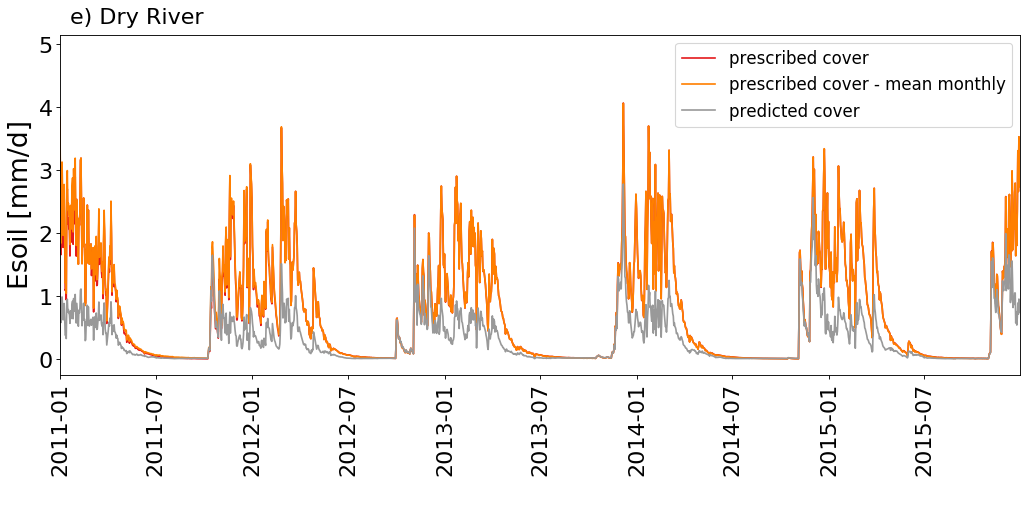

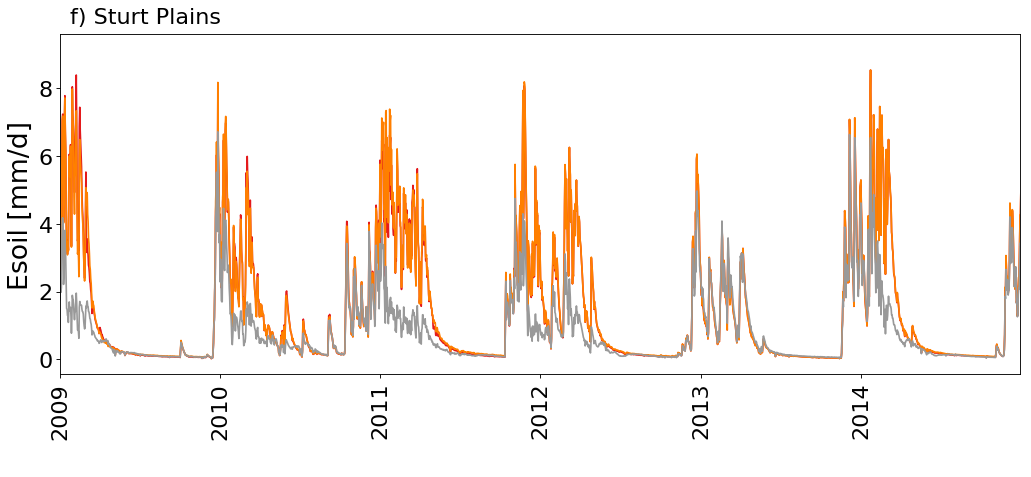

In [11]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v esoil -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "a) Howard Springs" --legend True  \
--palette Set1

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v esoil -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "b) Litchfield" --legend True  \
--palette Set1

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v esoil -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "c) Adelaide River" --legend True  \
--palette Set1

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v esoil -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "d) Daly Uncleared" --legend True  \
--palette Set1

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v esoil -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "e) Dry River" --legend True  \
--palette Set1

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v esoil -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--mf 1000 --ylabel "Esoil [mm/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "f) Sturt Plains"   \
--palette Set1




**Figure S4.5.** Soil evaporation for prescribed cover (red) and predicted cover (gray) for a) Howard Springs, b) Litchfield, c) Adelaide River d) Daly Uncleared, e) Dry River and f) Sturt Plains.  The soil evaporation compensates for the reduced values of transpiration and is higher for prescribed cover. 

## Timeseries of assimilation


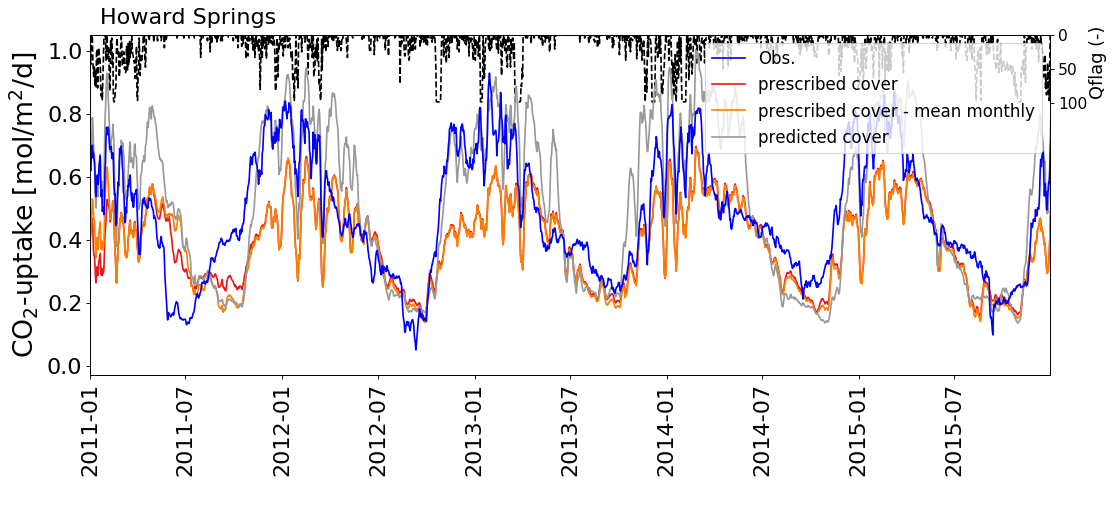

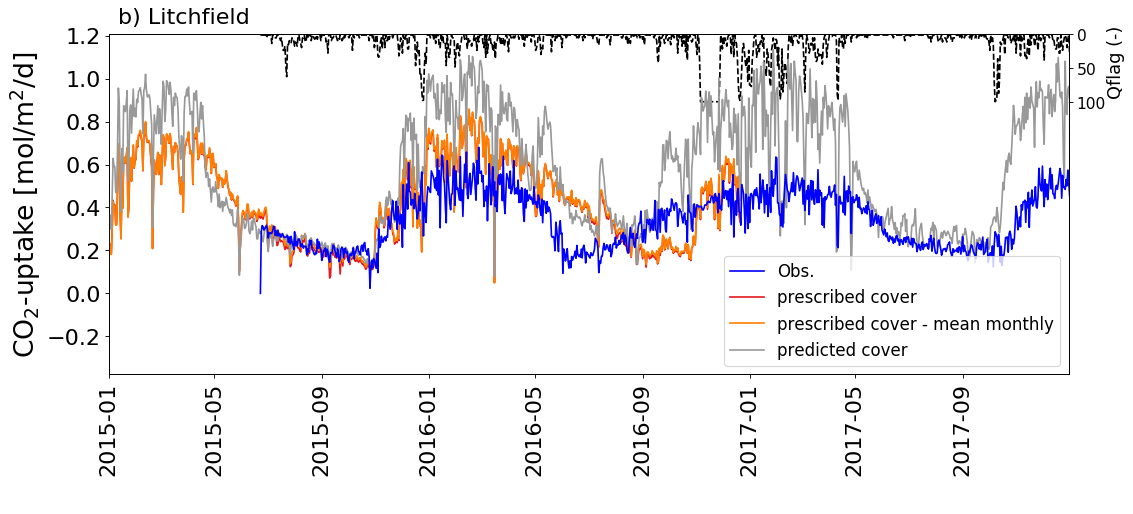

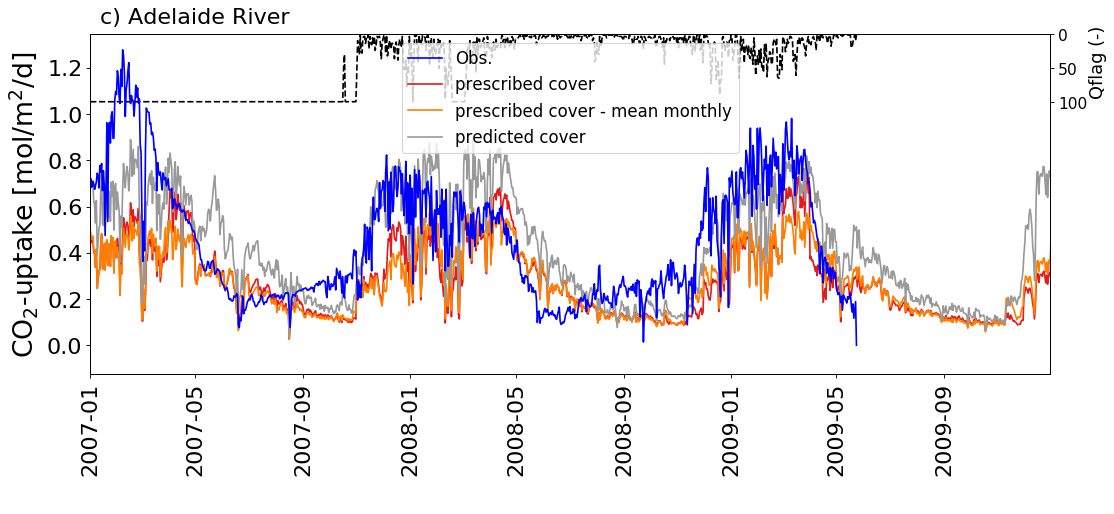

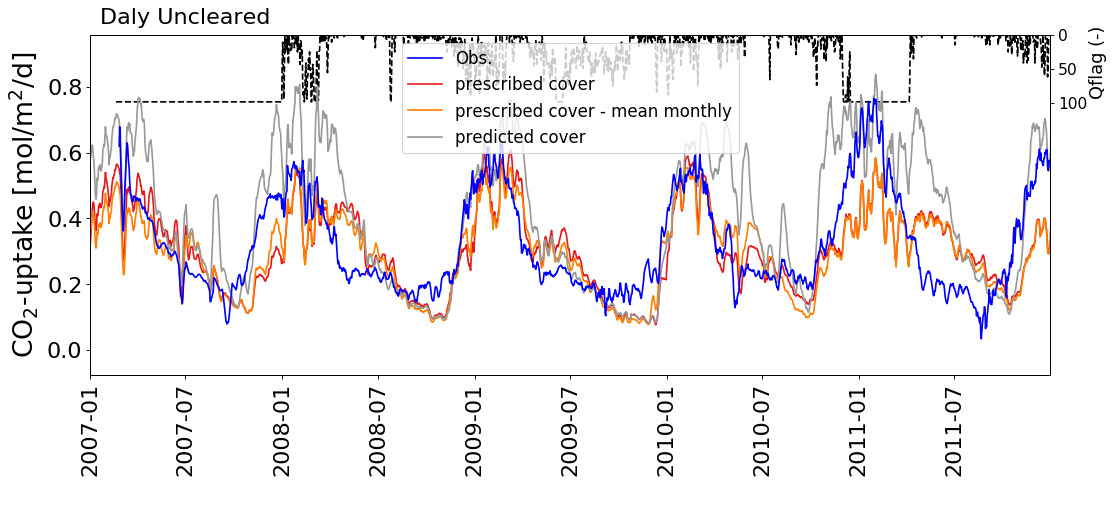

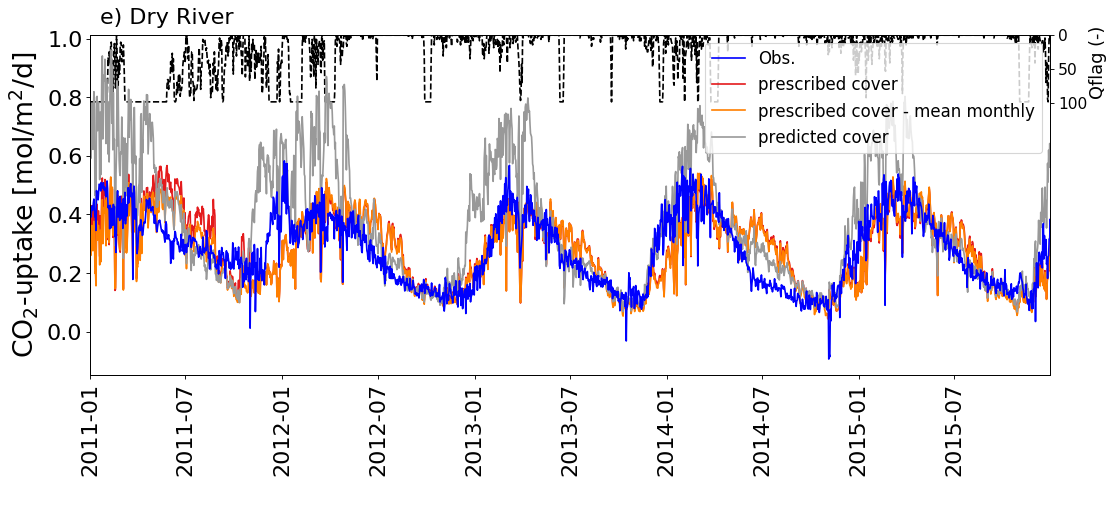

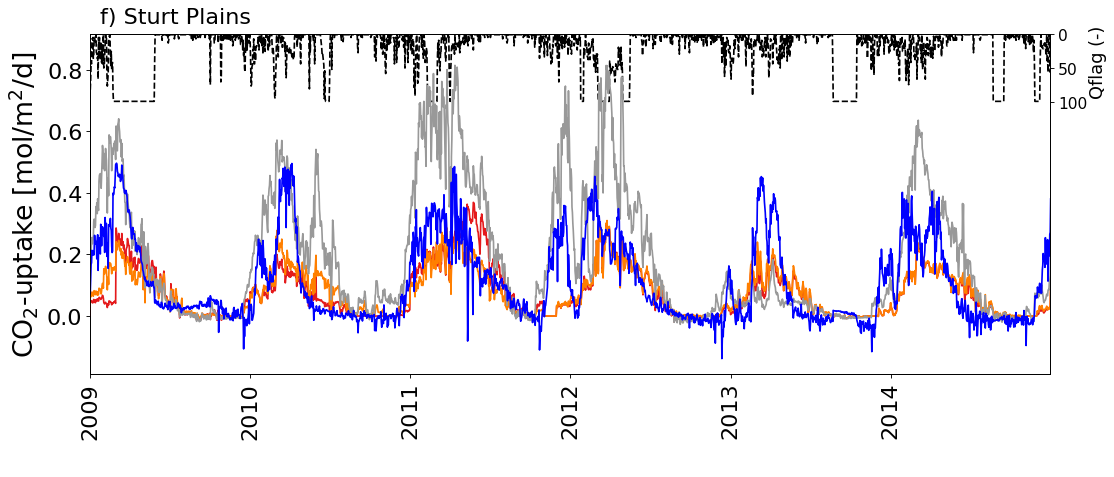

In [12]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]"  \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "Howard Springs" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FcQ_howard.txt --moving_average 7

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_litch.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]"  \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "b) Litchfield" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FcQ_litch.txt

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_adelaide.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]"  \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"  --title "c) Adelaide River" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FcQ_adelaide.txt

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_daly.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]"  \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "Daly Uncleared" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FcQ_daly.txt --moving_average 7

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_dry.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]"  \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"  --title "e) Dry River" --legend True  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FcQ_dry.txt

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_sturt.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]"  \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "f) Sturt Plains"  \
--palette Set1 --obs_qc ../../data/DINGO_QC/FcQ_sturt.txt




**Figure S4.6.** Comparison of total assimilation for the VOM with prescribed cover (red), predicted cover (gray) and fluxtower observations (blue) for a) Howard Springs, b) Litchfield, c) Adelaide River d) Daly Uncleared, e) Dry River and f) Sturt Plains. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The prescribed cover generally improves the delay in decaying CO$_2$-uptake at the end of the wet season. At the same time, assimilation is reduced during the wet season and the peaks with the predicted cover disappear. Especially the drier sites of Daly Uncleared, Dry River, and Sturt Plains show a better agreement with the observations when vegetation cover is prescribed, but Adelaide River and Howard Springs start to underestimate the CO$_2$-uptake.


### Assimilation trees

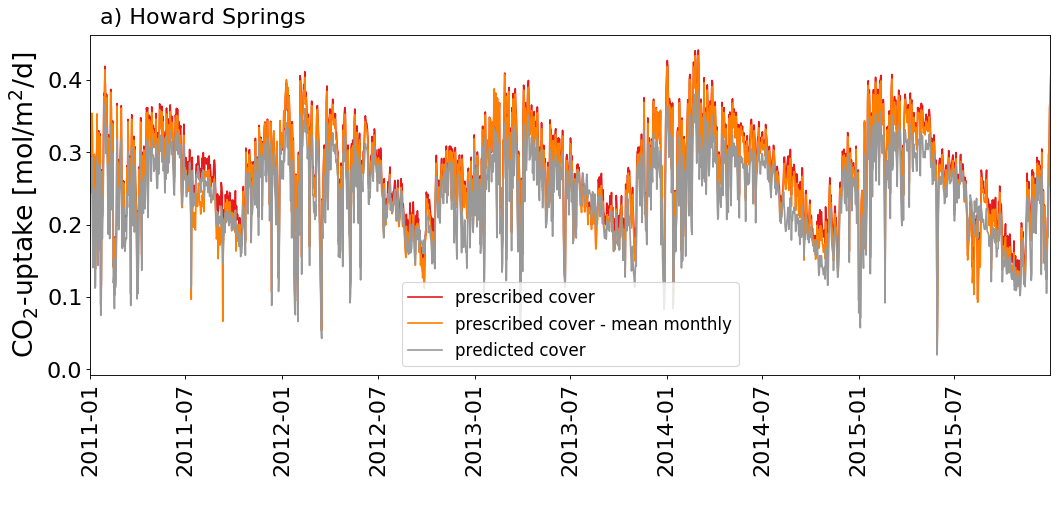

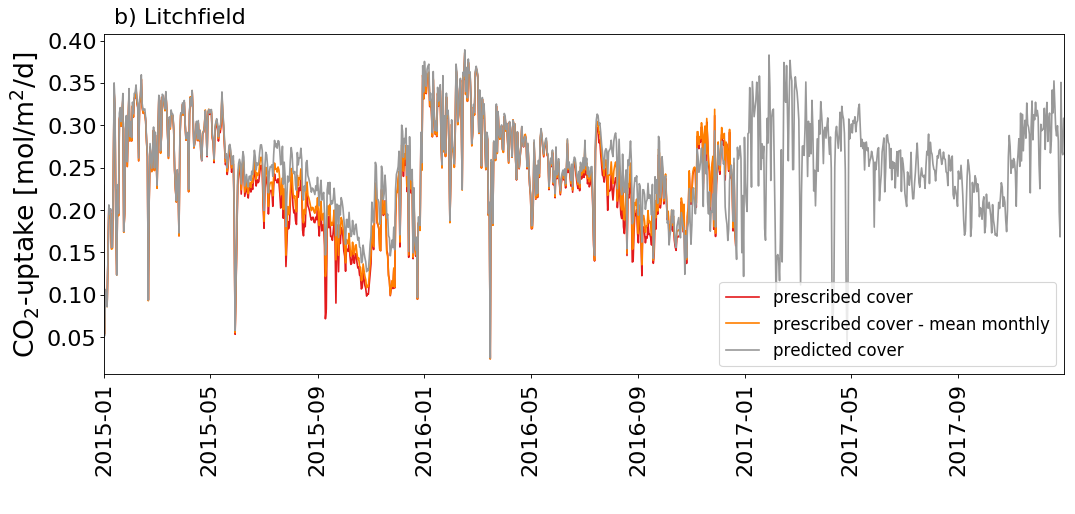

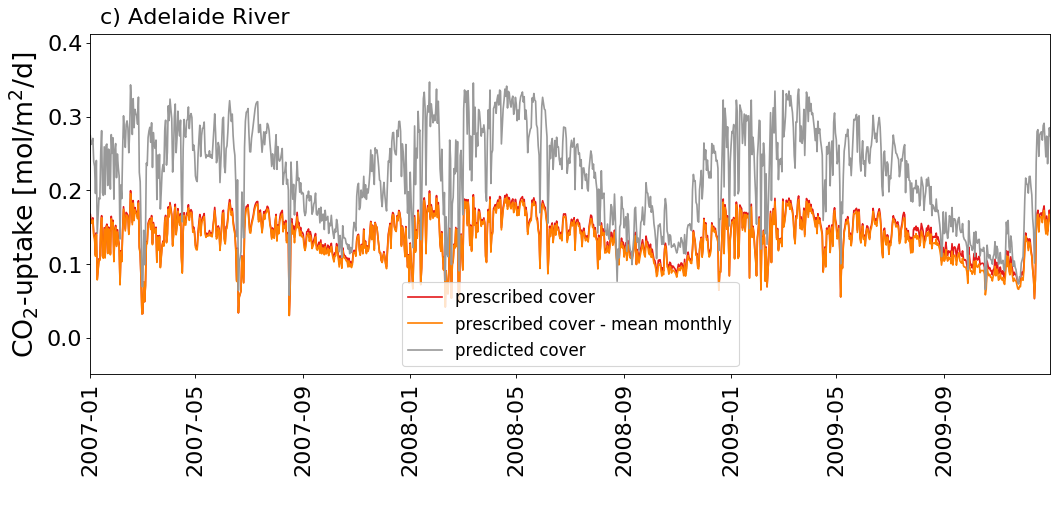

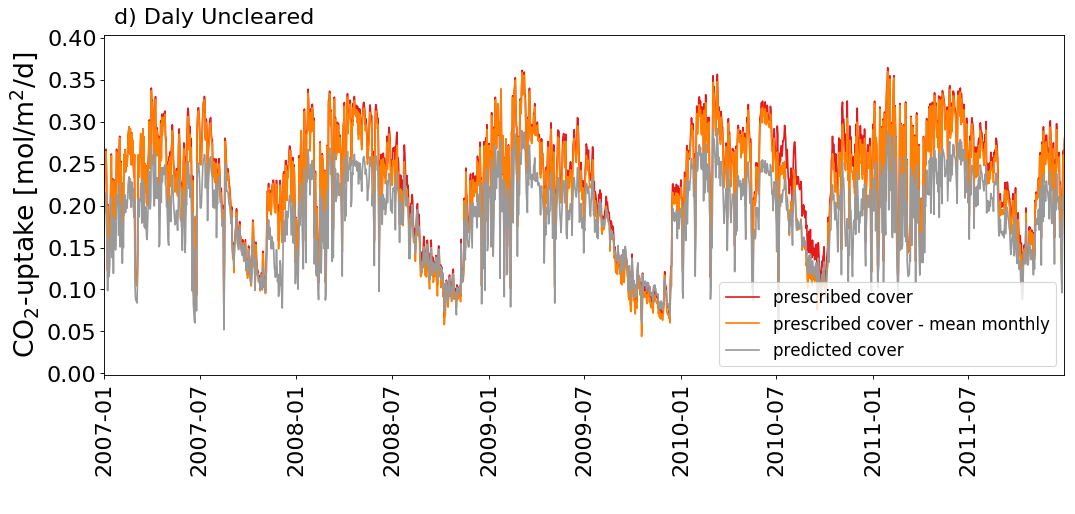

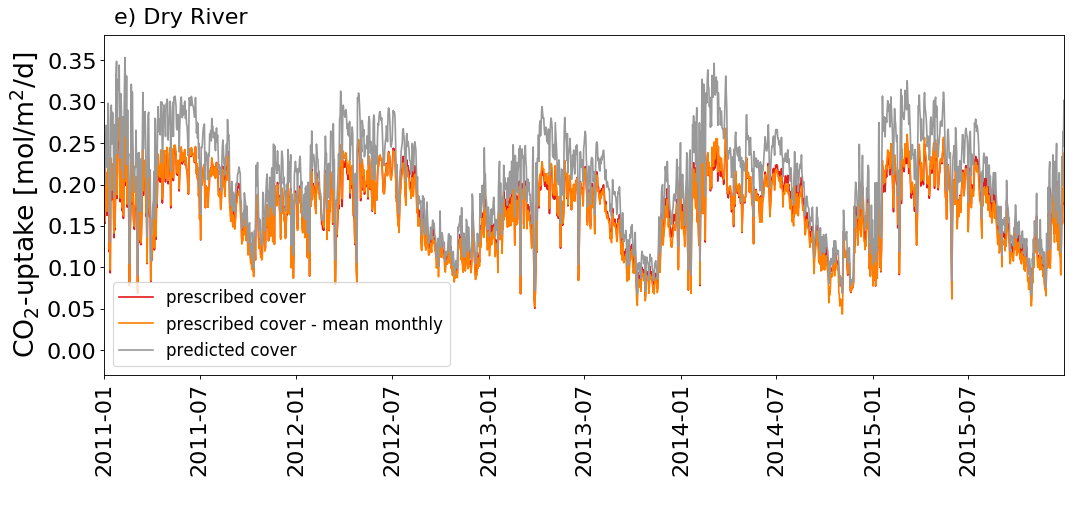

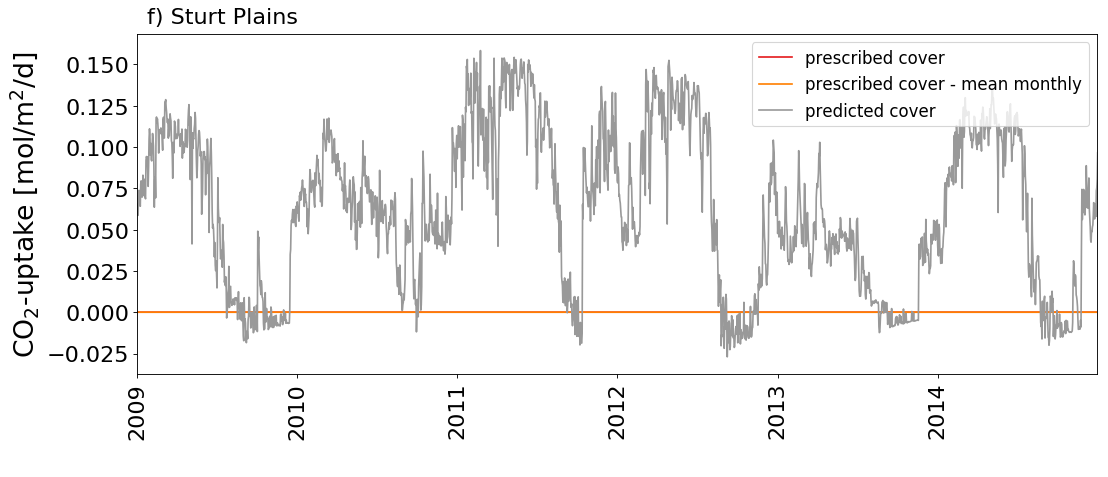

In [13]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asst -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "a) Howard Springs" --legend True  \
--palette Set1

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asst -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "b) Litchfield" --legend True  \
--palette Set1

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asst -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"  --title "c) Adelaide River" --legend True  \
--palette Set1



#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asst -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "d) Daly Uncleared" --legend True  \
--palette Set1

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asst -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"  --title "e) Dry River" --legend True  \
--palette Set1

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asst -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "f) Sturt Plains" --legend True  \
--palette Set1




**Figure S4.7.** Comparison of tree assimilation for the VOM with prescribed cover (red) and predicted cover (gray) for a) Howard Springs, b) Litchfield, c) Adelaide River d) Daly Uncleared, e) Dry River and f) Sturt Plains. The prescribed cover gives higher values of assimilation for Howard Springs, Litchfield and Daly Uncleared, but the assimilation goes down for Dry River and Sturt Plains.

### Assimilation grasses

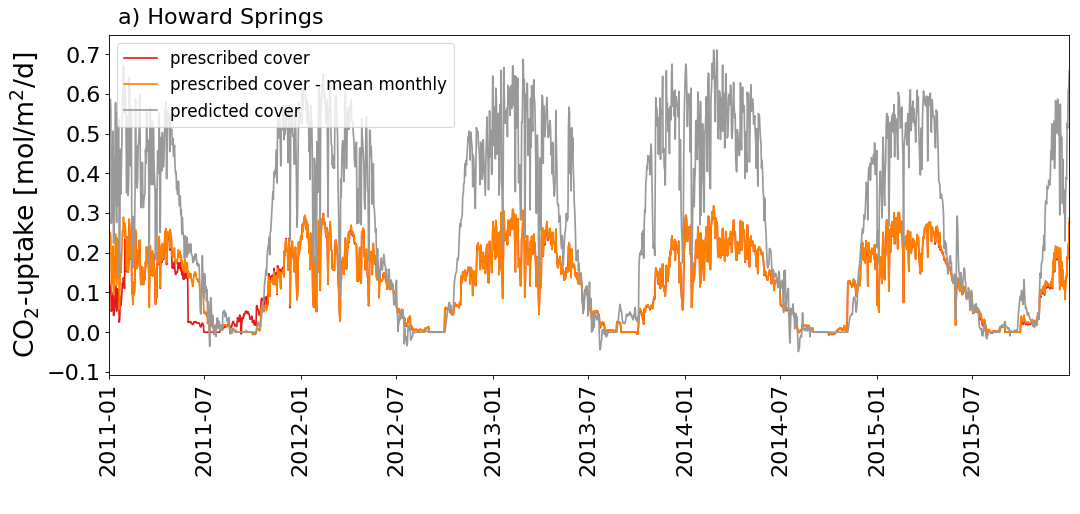

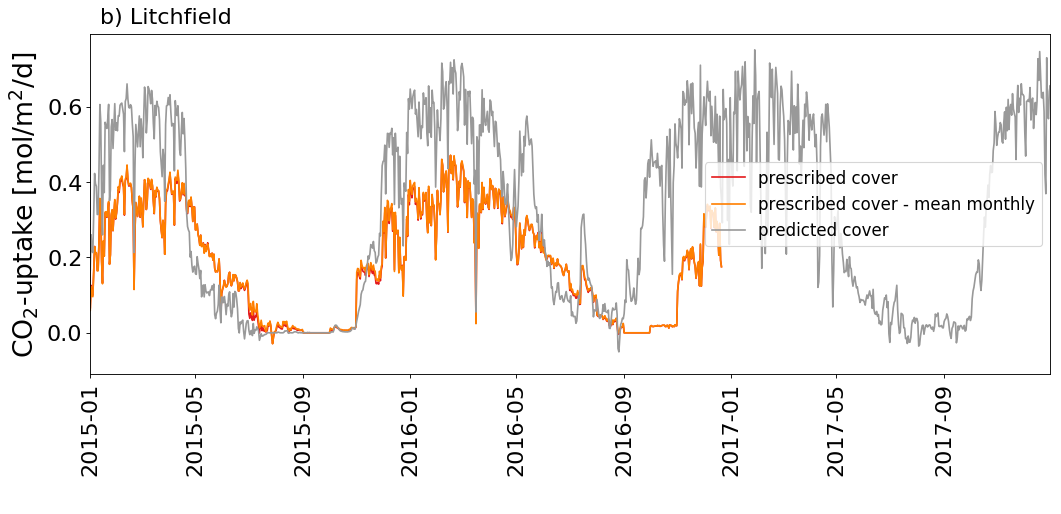

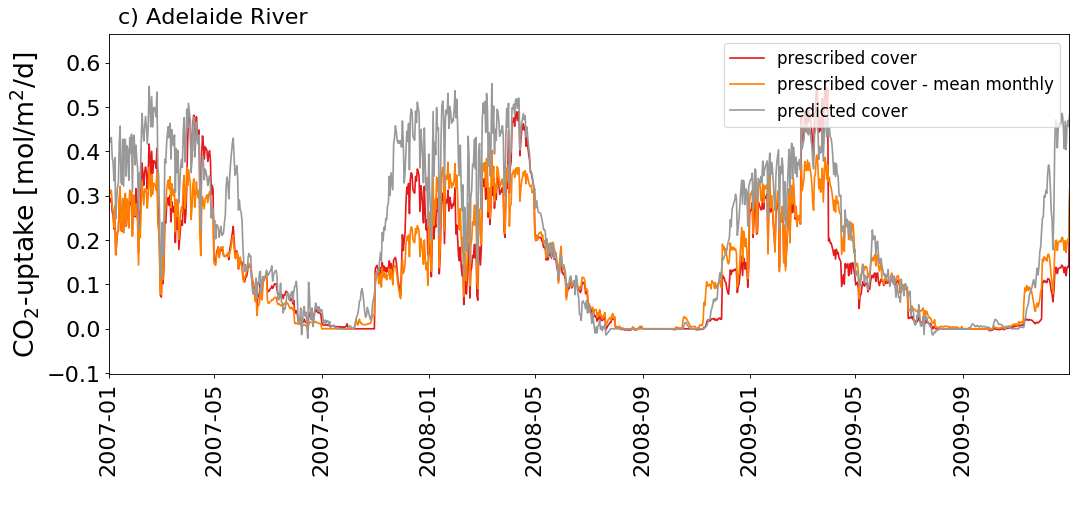

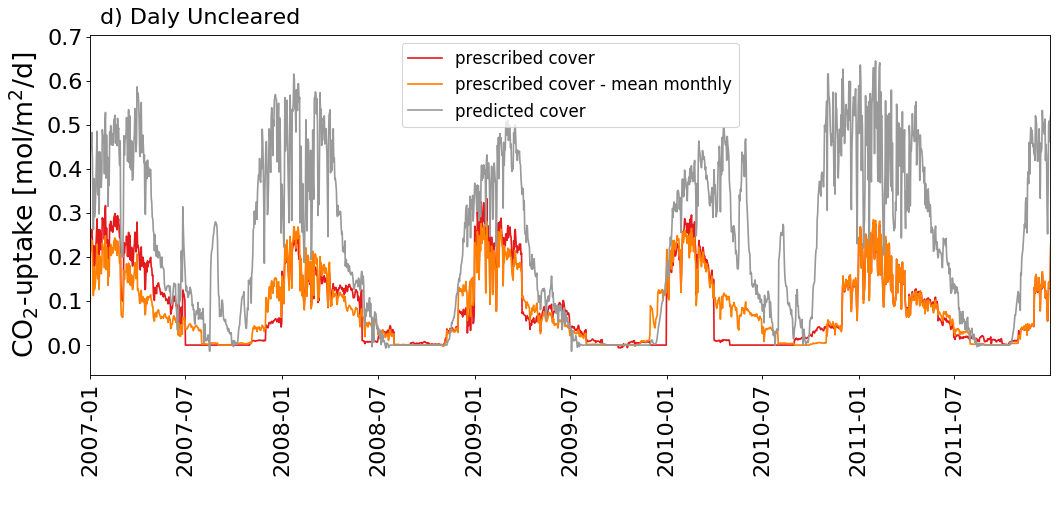

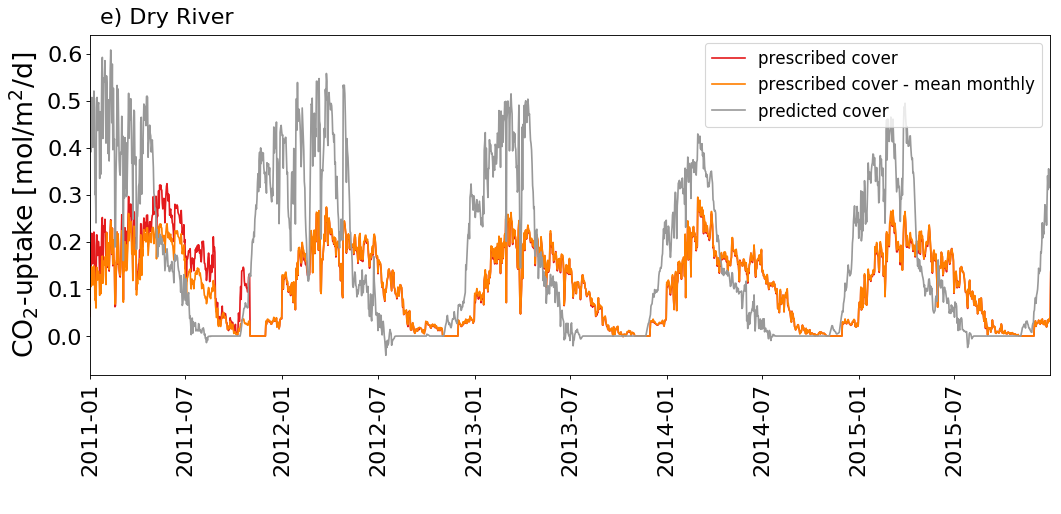

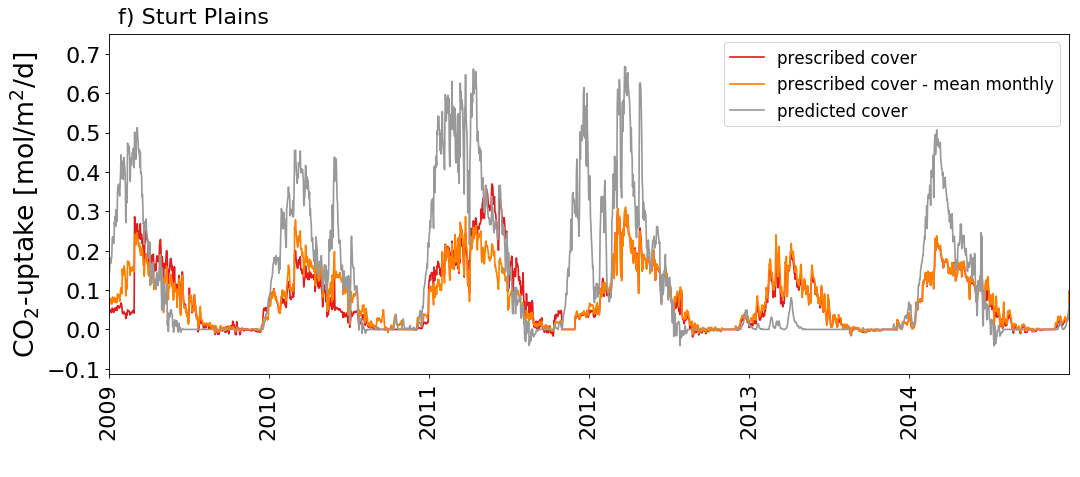

In [14]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v assg -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "a) Howard Springs" --legend True  \
--palette Set1

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/Litchfield/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v assg -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "b) Litchfield" --legend True  \
--palette Set1

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v assg -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"  --title "c) Adelaide River" --legend True  \
--palette Set1

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v assg -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "d) Daly Uncleared" --legend True  \
--palette Set1

#DryRiver -- still on HPC
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v assg -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]"\
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover"  --title "e) Dry River" --legend True  \
--palette Set1

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v assg -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "prescribed cover" "prescribed cover - mean monthly" "predicted cover" --title "f) Sturt Plains" --legend True  \
--palette Set1




**Figure S4.8.** Comparison of grass assimilation for the VOM with prescribed cover (red) and predicted cover (gray) for a) Howard Springs, b) Litchfield, c) Adelaide River d) Daly Uncleared, e) Dry River and f) Sturt Plains. The prescribed cover always gives lower values of grass assimilation for all sites.

##  Partitioning fluxes

In [15]:
def fluxpartitions(inputfile, startyear, endyear):

    #load data
    data = np.genfromtxt(inputfile, names=True)

    #make numpy arrays in the right units
    esoil = 1000*np.array(data["esoil"]) #mm/d
    etmt = 1000*np.array(data["etmt"])   #mm/d
    etmg = 1000*np.array(data["etmg"])   #mm/d
    assg = np.array(data["assg"])        #mol/m2/d
    asst = np.array(data["asst"])        #mol/m2/d

    #create series of pandas time
    tmod = np.arange(datetime(int(data['fyear'][0]),int(data['fmonth'][0]),int(data['fday'][0])), 
                      datetime(int(data['fyear'][-1]),int(data['fmonth'][-1]),int(data['fday'][-1]))+timedelta(days=1), 
                      timedelta(days=1)).astype(datetime)
                    
    #make pandas series
    esoil_pd = pd.Series(esoil, index=tmod)
    etmt_pd = pd.Series(etmt, index=tmod)
    etmg_pd = pd.Series(etmg, index=tmod)
    assg_pd = pd.Series(assg, index=tmod)
    asst_pd = pd.Series(asst, index=tmod)
                    
    esoil_ma = np.mean(esoil_pd[ (esoil_pd.index.year>=startyear) & (esoil_pd.index.year<=endyear)].resample('A').sum() ) 
    etmt_ma = np.mean(etmt_pd[(etmt_pd.index.year>=startyear) & (etmt_pd.index.year<=endyear)].resample('A').sum() ) 
    etmg_ma = np.mean(etmg_pd[(etmg_pd.index.year>=startyear) & (etmg_pd.index.year<=endyear)].resample('A').sum() ) 
    assg_ma = np.mean(assg_pd[(assg_pd.index.year>=startyear) & (assg_pd.index.year<=endyear)].resample('A').sum() ) 
    asst_ma = np.mean(asst_pd[(asst_pd.index.year>=startyear) & (asst_pd.index.year<=endyear)].resample('A').sum() ) 

    result = [esoil_ma, etmt_ma, etmg_ma, assg_ma, asst_ma]
                    
    return result      
                

In [16]:
def mean_annual_dingo(inputfile, startyear, endyear):

    #load data
    
    data = np.loadtxt(inputfile, usecols=2) #mm/d
    
    #create series of pandas time
    tflux_tmp = np.genfromtxt(inputfile, usecols=0, dtype=np.str )#mm/d
    tflux = pd.date_range(tflux_tmp[0], tflux_tmp[-1], freq='D')
                    
    #make pandas series
    vals_pd = pd.Series(data, index=tflux)                    
    vals_ma = np.mean(vals_pd[ (vals_pd.index.year>=startyear) & (vals_pd.index.year<=endyear)].resample('A').sum() ) 
                    
    return vals_ma      
                

In [17]:

Ea_howard_obs = mean_annual_dingo("../../data/DINGO/Ea_howard.txt", 2002, 2017)
Ea_litch_obs = mean_annual_dingo("../../data/DINGO/Ea_litch.txt", 2016, 2018)
Ea_adelaide_obs = mean_annual_dingo("../../data/DINGO/Ea_adelaide.txt",  2007, 2008)
Ea_daly_obs = mean_annual_dingo("../../data/DINGO/Ea_daly.txt", 2008, 2017)
Ea_dry_obs = mean_annual_dingo("../../data/DINGO/Ea_dry.txt", 2009, 2017)
Ea_sturt_obs = mean_annual_dingo("../../data/DINGO/Ea_sturt.txt", 2009, 2017)

etot_dingo = [Ea_howard_obs, Ea_litch_obs, Ea_adelaide_obs, Ea_daly_obs, Ea_dry_obs,Ea_sturt_obs    ]

In [18]:
GPP_howard_obs = mean_annual_dingo("../../data/DINGO/GPPdaily_howard.txt", 2002, 2017)* -1.0
GPP_litch_obs = mean_annual_dingo("../../data/DINGO/GPPdaily_litch.txt", 2016, 2018)* -1.0
GPP_adelaide_obs = mean_annual_dingo("../../data/DINGO/GPPdaily_adelaide.txt", 2007, 2008)* -1.0
GPP_daly_obs = mean_annual_dingo("../../data/DINGO/GPPdaily_daly.txt", 2008, 2017)* -1.0
GPP_dry_obs = mean_annual_dingo("../../data/DINGO/GPPdaily_dry.txt", 2009, 2017)* -1.0
GPP_sturt_obs =mean_annual_dingo("../../data/DINGO/GPPdaily_sturt.txt", 2009, 2017) * -1.0

gpptot_dingo = [GPP_howard_obs, GPP_litch_obs, GPP_adelaide_obs,GPP_daly_obs, GPP_dry_obs, GPP_sturt_obs  ] 

In [19]:
#mean annual fluxes for predicted cover
ma_howard = fluxpartitions("../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt", 1995, 2015)
ma_litch = fluxpartitions("../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt", 1995, 2015)
ma_adelaide= fluxpartitions("../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt",1995, 2015)
ma_daly = fluxpartitions("../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt",1995, 2015)
ma_dry = fluxpartitions("../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt",1995, 2015)
ma_sturt = fluxpartitions("../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt",1995, 2015)


In [20]:
#mean annual fluxes for prescribed cover
ma_howard_pc = fluxpartitions("../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt", 1995, 2015)
ma_litch_pc = fluxpartitions("../../data/VOM_output/additional_analyses/prescribed_cover/Litchfield/sce_best/results_daily.txt",1995, 2015)
ma_adelaide_pc= fluxpartitions("../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt",1995, 2015)
ma_daly_pc = fluxpartitions("../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt",1995, 2015)
ma_dry_pc = fluxpartitions("../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt",1995, 2015)
ma_sturt_pc = fluxpartitions("../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt",1995, 2015)


In [21]:
#mean annual fluxes for prescribed cover
ma_howard_pc2 = fluxpartitions("../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt", 1995, 2015)
ma_litch_pc2 = fluxpartitions("../../data/VOM_output/additional_analyses/prescribed_cover2/Litchfield/sce_best/results_daily.txt",1995, 2015)
ma_adelaide_pc2= fluxpartitions("../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt",1995, 2015)
ma_daly_pc2 = fluxpartitions("../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt",1995, 2015)
ma_dry_pc2 = fluxpartitions("../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt",1995, 2015)
ma_sturt_pc2 = fluxpartitions("../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt",1995, 2015)


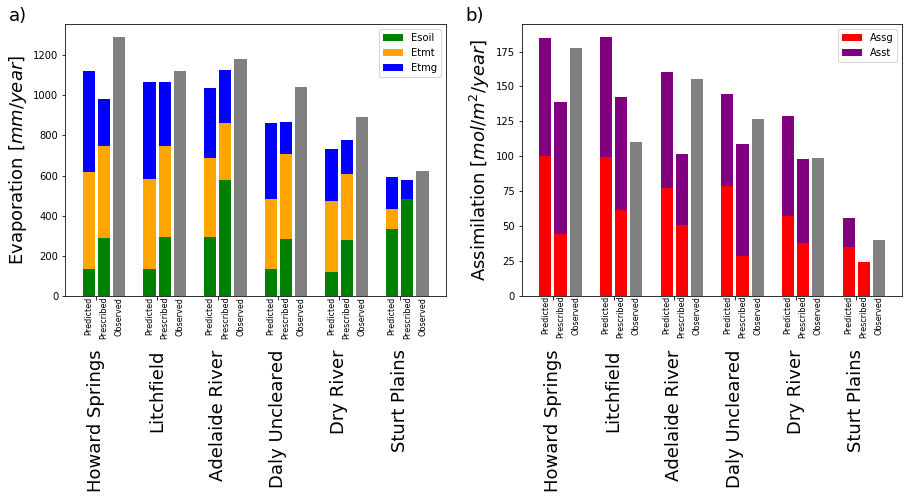

In [22]:

ind = np.arange(0,24, 4)
ind2 = ind + 1
ind3 = ind2 + 1

esoil_ma = [ma_howard[0], ma_litch[0], ma_adelaide[0], ma_daly[0], ma_dry[0], ma_sturt[0]]
etmt_ma = [ma_howard[1], ma_litch[1], ma_adelaide[1], ma_daly[1], ma_dry[1], ma_sturt[1]]
etmg_ma = [ma_howard[2], ma_litch[2], ma_adelaide[2], ma_daly[2], ma_dry[2], ma_sturt[2]]
assg_ma = [ma_howard[3], ma_litch[3], ma_adelaide[3], ma_daly[3], ma_dry[3], ma_sturt[3]]
asst_ma = [ma_howard[4], ma_litch[4], ma_adelaide[4], ma_daly[4], ma_dry[4], ma_sturt[4]]


esoil_ma_pc = [ma_howard_pc[0], ma_litch_pc[0], ma_adelaide_pc[0], ma_daly_pc[0], ma_dry_pc[0], ma_sturt_pc[0]]
etmt_ma_pc = [ma_howard_pc[1], ma_litch_pc[1], ma_adelaide_pc[1], ma_daly_pc[1], ma_dry_pc[1], ma_sturt_pc[1]]
etmg_ma_pc = [ma_howard_pc[2], ma_litch_pc[2], ma_adelaide_pc[2], ma_daly_pc[2], ma_dry_pc[2], ma_sturt_pc[2]]
assg_ma_pc = [ma_howard_pc[3], ma_litch_pc[3], ma_adelaide_pc[3], ma_daly_pc[3], ma_dry_pc[3], ma_sturt_pc[3]]
asst_ma_pc = [ma_howard_pc[4], ma_litch_pc[4], ma_adelaide_pc[4], ma_daly_pc[4], ma_dry_pc[4], ma_sturt_pc[4]]

fig, ax   = plt.subplots(nrows=1, ncols=2, figsize=(15, 5) )

p1 = ax[0].bar(ind, esoil_ma, color="green")
p2 = ax[0].bar(ind, etmt_ma, bottom=esoil_ma, color="orange")
p3 = ax[0].bar(ind, etmg_ma, bottom=np.add(etmt_ma,esoil_ma),color="blue")

p4 = ax[0].bar(ind2, esoil_ma_pc, color="green")
p5 = ax[0].bar(ind2, etmt_ma_pc, bottom=esoil_ma_pc, color="orange")
p6 = ax[0].bar(ind2, etmg_ma_pc, bottom=np.add(etmt_ma_pc,esoil_ma_pc), color="blue")

p7 = ax[0].bar(ind3, etot_dingo, color="grey")


ax[0].set_ylabel(r'Evaporation $[mm/year]$', fontsize=18)
ax[0].set_xticks(ind+0.5) 
ax[0].tick_params(axis="x", pad = 50)
ax[0].set_xticklabels( ('Howard Springs', 'Litchfield', 'Adelaide River', 'Daly Uncleared', 'Dry River', "Sturt Plains"),rotation=90, fontsize=18)
ax[0].legend((p1[0], p2[0], p3[0]), ('Esoil', 'Etmt', 'Etmg'))

ax[0].text(-0.15, 1.01, "a)", transform=ax[0].transAxes, 
            size=18)

for loc in ind:
    ax[0].text(loc, -40, "Predicted", size=8, rotation=90, horizontalalignment='center')
    
for loc in ind2:
    ax[0].text(loc, -40, "Prescribed", size=8, rotation=90, horizontalalignment='center')

for loc in ind3:
    ax[0].text(loc, -40, "Observed", size=8, rotation=90, horizontalalignment='center')
    
p1 = ax[1].bar(ind, assg_ma, color="red")
p2 = ax[1].bar(ind, asst_ma, bottom=assg_ma, color="purple")

p4 = ax[1].bar(ind2, assg_ma_pc, color="red")
p5 = ax[1].bar(ind2, asst_ma_pc, bottom=assg_ma_pc, color="purple")

p6 = ax[1].bar(ind3, gpptot_dingo, color="grey")

for loc in ind:
    ax[1].text(loc, -5, "Predicted", size=8, rotation=90, horizontalalignment='center')
    
for loc in ind2:
    ax[1].text(loc, -5, "Prescribed", size=8, rotation=90, horizontalalignment='center')

for loc in ind3:
    ax[1].text(loc, -5, "Observed", size=8, rotation=90, horizontalalignment='center')
     
    
ax[1].set_ylabel(r'Assimilation $[mol/m^2/year]$', fontsize=18)
ax[1].set_xticks(ind+0.5) 
ax[1].tick_params(axis="x",pad = 50)
ax[1].set_xticklabels( ('Howard Springs', 'Litchfield', 'Adelaide River', 'Daly Uncleared', 'Dry River', "Sturt Plains"),rotation=90, fontsize=18 )
ax[1].legend((p1[0], p2[0]), ('Assg', 'Asst'))

ax[1].text(-0.15, 1.01, "b)", transform=ax[1].transAxes, size=18)

plt.show()

**Figure S4.9.** Partitioning of the fluxes for a) evaporatin and b) assimilation, flux tower observations are shown in gray. The prescribed cover always gives lower values of grass assimilation grass transpiration for all sites.

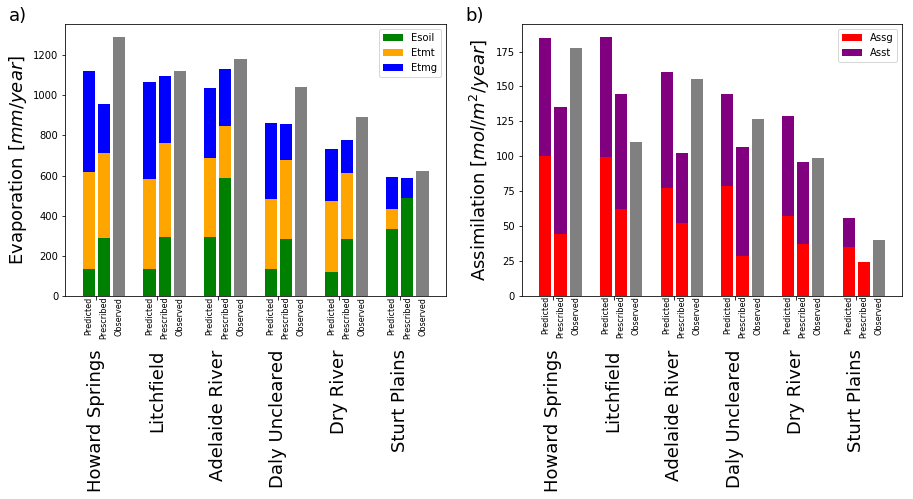

In [23]:

ind = np.arange(0,24, 4)
ind2 = ind + 1
ind3 = ind2 + 1

esoil_ma = [ma_howard[0], ma_litch[0], ma_adelaide[0], ma_daly[0], ma_dry[0], ma_sturt[0]]
etmt_ma = [ma_howard[1], ma_litch[1], ma_adelaide[1], ma_daly[1], ma_dry[1], ma_sturt[1]]
etmg_ma = [ma_howard[2], ma_litch[2], ma_adelaide[2], ma_daly[2], ma_dry[2], ma_sturt[2]]
assg_ma = [ma_howard[3], ma_litch[3], ma_adelaide[3], ma_daly[3], ma_dry[3], ma_sturt[3]]
asst_ma = [ma_howard[4], ma_litch[4], ma_adelaide[4], ma_daly[4], ma_dry[4], ma_sturt[4]]


esoil_ma_pc = [ma_howard_pc2[0], ma_litch_pc2[0], ma_adelaide_pc2[0], ma_daly_pc2[0], ma_dry_pc2[0], ma_sturt_pc2[0]]
etmt_ma_pc = [ma_howard_pc2[1], ma_litch_pc2[1], ma_adelaide_pc2[1], ma_daly_pc2[1], ma_dry_pc2[1], ma_sturt_pc2[1]]
etmg_ma_pc = [ma_howard_pc2[2], ma_litch_pc2[2], ma_adelaide_pc2[2], ma_daly_pc2[2], ma_dry_pc2[2], ma_sturt_pc2[2]]
assg_ma_pc = [ma_howard_pc2[3], ma_litch_pc2[3], ma_adelaide_pc2[3], ma_daly_pc2[3], ma_dry_pc2[3], ma_sturt_pc2[3]]
asst_ma_pc = [ma_howard_pc2[4], ma_litch_pc2[4], ma_adelaide_pc2[4], ma_daly_pc2[4], ma_dry_pc2[4], ma_sturt_pc2[4]]

fig, ax   = plt.subplots(nrows=1, ncols=2, figsize=(15, 5) )

p1 = ax[0].bar(ind, esoil_ma, color="green")
p2 = ax[0].bar(ind, etmt_ma, bottom=esoil_ma, color="orange")
p3 = ax[0].bar(ind, etmg_ma, bottom=np.add(etmt_ma,esoil_ma),color="blue")

p4 = ax[0].bar(ind2, esoil_ma_pc, color="green")
p5 = ax[0].bar(ind2, etmt_ma_pc, bottom=esoil_ma_pc, color="orange")
p6 = ax[0].bar(ind2, etmg_ma_pc, bottom=np.add(etmt_ma_pc,esoil_ma_pc), color="blue")

p7 = ax[0].bar(ind3, etot_dingo, color="grey")


ax[0].set_ylabel(r'Evaporation $[mm/year]$', fontsize=18)
ax[0].set_xticks(ind+0.5) 
ax[0].tick_params(axis="x", pad = 50)
ax[0].set_xticklabels( ('Howard Springs', 'Litchfield', 'Adelaide River', 'Daly Uncleared', 'Dry River', "Sturt Plains"),rotation=90, fontsize=18)
ax[0].legend((p1[0], p2[0], p3[0]), ('Esoil', 'Etmt', 'Etmg'))

ax[0].text(-0.15, 1.01, "a)", transform=ax[0].transAxes, 
            size=18)

for loc in ind:
    ax[0].text(loc, -40, "Predicted", size=8, rotation=90, horizontalalignment='center')
    
for loc in ind2:
    ax[0].text(loc, -40, "Prescribed", size=8, rotation=90, horizontalalignment='center')

for loc in ind3:
    ax[0].text(loc, -40, "Observed", size=8, rotation=90, horizontalalignment='center')
    
p1 = ax[1].bar(ind, assg_ma, color="red")
p2 = ax[1].bar(ind, asst_ma, bottom=assg_ma, color="purple")

p4 = ax[1].bar(ind2, assg_ma_pc, color="red")
p5 = ax[1].bar(ind2, asst_ma_pc, bottom=assg_ma_pc, color="purple")

p6 = ax[1].bar(ind3, gpptot_dingo, color="grey")

for loc in ind:
    ax[1].text(loc, -5, "Predicted", size=8, rotation=90, horizontalalignment='center')
    
for loc in ind2:
    ax[1].text(loc, -5, "Prescribed", size=8, rotation=90, horizontalalignment='center')

for loc in ind3:
    ax[1].text(loc, -5, "Observed", size=8, rotation=90, horizontalalignment='center')
     
    
ax[1].set_ylabel(r'Assimilation $[mol/m^2/year]$', fontsize=18)
ax[1].set_xticks(ind+0.5) 
ax[1].tick_params(axis="x",pad = 50)
ax[1].set_xticklabels( ('Howard Springs', 'Litchfield', 'Adelaide River', 'Daly Uncleared', 'Dry River', "Sturt Plains"),rotation=90, fontsize=18 )
ax[1].legend((p1[0], p2[0]), ('Assg', 'Asst'))

ax[1].text(-0.15, 1.01, "b)", transform=ax[1].transAxes, size=18)

plt.show()

**Figure S4.10.** Partitioning of the fluxes for a) evaporatin and b) assimilation, flux tower observations are shown in gray. The prescribed cover is here based on solely mean monthly values.

## Parameters

<Figure size 1280x400 with 0 Axes>

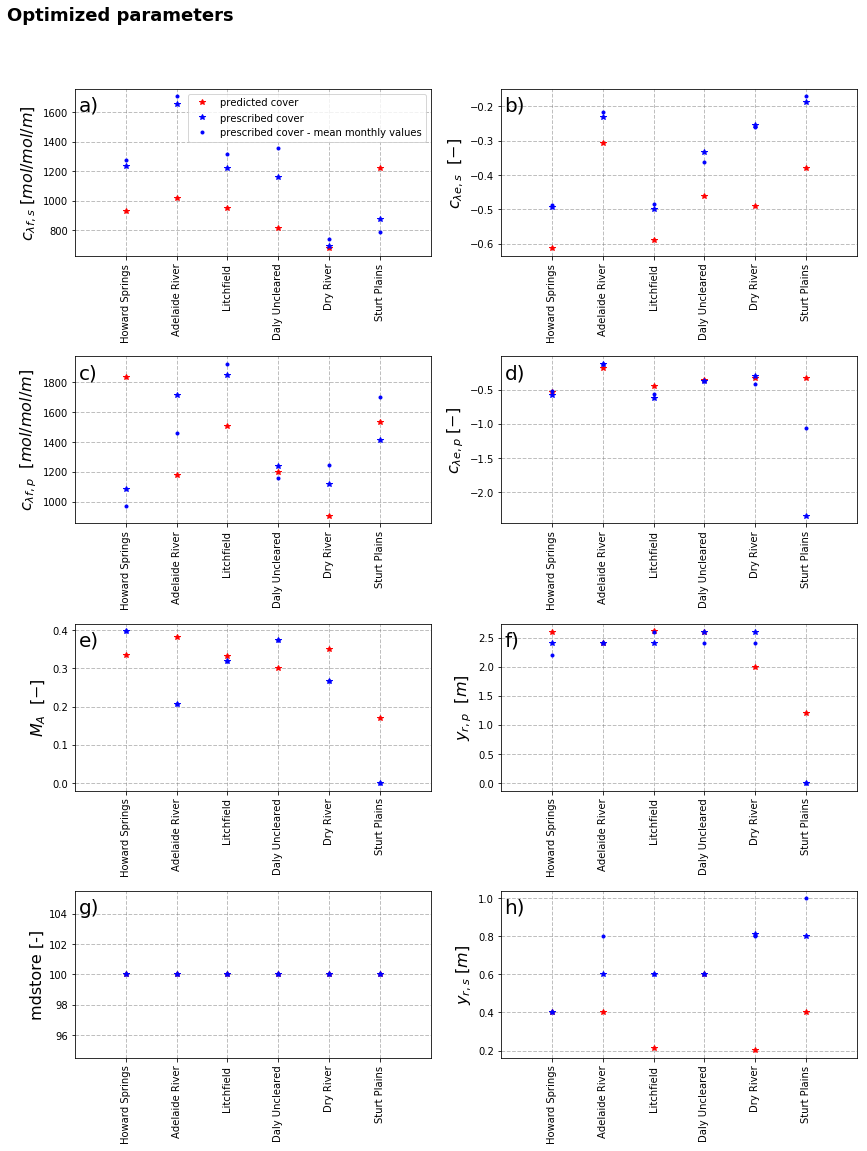

In [24]:
#plot parameters

basin = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains"]
site_names = ["Howard Springs", "Adelaide River", "Litchfield", "Daly Uncleared", "Dry River", "Sturt Plains" ]



fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
#fig, ((ax0, ax1, ax2, ax3, ax4, ax5, ax6) )  = plt.subplots(nrows=1, ncols=7, figsize=(16, 5)) 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15)) 
ax = axes.flat


for ibasin in  np.array([0, 1, 2, 3, 4, 5]):  
    
    #loop over files and load
    try:
        params = np.loadtxt("../../work/" + 
             basin[ibasin] + "/freedrainage_cpcff1.0/best/input/pars.txt") #mm/d
    except OSError:
        print("../../work/" + 
             basin[ibasin] + "/freedrainage_cpcff1.0/best/input/pars.txt") #mm/d
  
    try:
        params_pc = np.loadtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
             basin[ibasin] + "/sce_best/pars.txt") #mm/d
    except OSError:
        params_pc = np.loadtxt("../../work/additional_analyses/prescribed_cover/" + 
             basin[ibasin] + "/best/input/pars.txt") #mm/d
        
    try:
        params_pc2 = np.loadtxt("../../data/VOM_output/additional_analyses/prescribed_cover2/" + 
             basin[ibasin] + "/sce_best/pars.txt") #mm/d
    except OSError:
        params_pc2 = np.loadtxt("../../work/additional_analyses/prescribed_cover2/" + 
             basin[ibasin] + "/best/input/pars.txt") #mm/d
        
        
    #for irun in range(0,4):
    if(ibasin == 0):
        ax[0].plot([ibasin], params[0], "r*" , label = "predicted cover" ) 
        ax[0].plot([ibasin], params_pc[0], "b*" , label =  "prescribed cover" ) 
        ax[0].plot([ibasin], params_pc2[0], "b." , label =  "prescribed cover - mean monthly values" ) 

    else:
        ax[0].plot([ibasin], params[0], "r*" ) 
        ax[0].plot([ibasin], params_pc[0], "b*" )
        ax[0].plot([ibasin], params_pc2[0], "b." ) 

        
    ax[1].plot([ibasin], params[1], "r*" , label = "VOM" ) 
    ax[1].plot([ibasin], params_pc[1], "b*"  )
    ax[1].plot([ibasin], params_pc2[1], "b." ) 


    ax[2].plot([ibasin], params[2], "r*" , label = "VOM" ) 
    ax[2].plot([ibasin], params_pc[2], "b*"  ) 
    ax[2].plot([ibasin], params_pc2[2], "b."  ) 

    ax[3].plot([ibasin], params[3], "r*" , label = "VOM" ) 
    ax[3].plot([ibasin], params_pc[3], "b*" )
    ax[3].plot([ibasin], params_pc2[3], "b." )

    ax[4].plot([ibasin], params[4], "r*" , label = "VOM" ) 
    ax[4].plot([ibasin], params_pc[4], "b*"  )
    ax[4].plot([ibasin], params_pc2[4], "b."  ) 

    ax[5].plot([ibasin], params[5], "r*" , label = "VOM" ) 
    ax[5].plot([ibasin], params_pc[5], "b*" ) 
    ax[5].plot([ibasin], params_pc2[5], "b."  ) 

    ax[6].plot([ibasin], params[6], "r*" , label = "VOM" ) 
    ax[6].plot([ibasin], params_pc[6], "b*" ) 
    ax[6].plot([ibasin], params_pc2[6], "b." ) 
    
    ax[7].plot([ibasin], params[7], "r*" , label = "VOM" ) 
    ax[7].plot([ibasin], params_pc[7], "b*") 
    ax[7].plot([ibasin], params_pc2[7], "b.") 


#ax0.set_ylim([0,10])  
ax[0].set_xlim( -1, 6  )     
ax[0].set_xticks( [0,1,2,3,4,5] )  
ax[0].set_xticklabels( site_names, rotation=90 )  
ax[0].set_ylabel(r"$c_{\lambda f,s}$ $[mol/mol/m ]$", size=16 )  
ax[0].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[0].text(0.01, 0.9, "a)", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)
ax[0].legend()

#ax1.set_ylim([0,10])  
ax[1].set_xlim( -1, 6  )     
ax[1].set_xticks( [0,1,2,3,4,5] )  
ax[1].set_xticklabels( site_names, rotation=90 )  
ax[1].set_ylabel(r"$c_{\lambda e,s}$  $[-]$", size=16 )  
ax[1].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[1].text(0.01, 0.9, "b)", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)

#ax2.set_ylim([0,1]) 
ax[2].set_xlim( -1, 6  ) 
ax[2].set_xticks( [0,1,2,3,4,5] )  
ax[2].set_xticklabels( site_names, rotation=90 )  
ax[2].set_ylabel(r"$c_{\lambda f,p}$  $[mol/mol/m ]$", size=16 )
ax[2].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[2].text(0.01, 0.9, "c)", ha='left', va='center', transform=ax[2].transAxes, fontsize=20)

#ax0.set_ylim([0,1])  
ax[3].set_xlim( -1, 6  )   
ax[3].set_xticks( [0,1,2,3,4,5] )  
ax[3].set_xticklabels( site_names, rotation=90 )  
ax[3].set_ylabel(r"$c_{\lambda e,p}$ $[-]$", size=16 ) 
ax[3].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[3].text(0.01, 0.9, "d)", ha='left', va='center', transform=ax[3].transAxes, fontsize=20)

#ax1.set_ylim([0,10])  
ax[4].set_xlim( -1, 6  )     
ax[4].set_xticks( [0,1,2,3,4,5] )  
ax[4].set_xticklabels( site_names, rotation=90 )  
ax[4].set_ylabel(r"$M_A$  $[-]$", size=16 )  
ax[4].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[4].text(0.01, 0.9, "e)", ha='left', va='center', transform=ax[4].transAxes, fontsize=20)

#ax2.set_ylim([0,1]) 
ax[5].set_xlim( -1, 6  ) 
ax[5].set_xticks( [0,1,2,3,4,5] )  
ax[5].set_xticklabels( site_names, rotation=90 )  
ax[5].set_ylabel(r"$y_{r,p}$  $[m]$", size=16 )  
ax[5].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[5].text(0.01, 0.9, "f)", ha='left', va='center', transform=ax[5].transAxes, fontsize=20)

ax[6].set_xlim( -1, 6  ) 
ax[6].set_xticks( [0,1,2,3,4,5] )  
ax[6].set_xticklabels( site_names, rotation=90 )  
ax[6].set_ylabel("mdstore [-]", size=16 )  
ax[6].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[6].text(0.01, 0.9, "g)", ha='left', va='center', transform=ax[6].transAxes, fontsize=20)

ax[7].set_xlim( -1, 6  ) 
ax[7].set_xticks( [0,1,2,3,4,5] )  
ax[7].set_xticklabels( site_names, rotation=90 )  
ax[7].set_ylabel(r"$y_{r,s}$ $[m]$", size=16 )  
ax[7].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[7].text(0.01, 0.9, "h)", ha='left', va='center', transform=ax[7].transAxes, fontsize=20)


plt.figtext( x=0, y=1.05, s="Optimized parameters", weight='bold', fontsize = 18)
plt.tight_layout()
    
plt.show()


**Figure S4.10.** Optimal vegetation parameters for prescribed cover (blue) and predicted cover (red) , for a) and b) the two parameters $c_{\lambda f,s}$ and  $c_{\lambda e,s}$ effecting the water use for perennial vegetation, c) and d) the two parameters $c_{\lambda f,p}$ and $c_{\lambda e,p}$ effecting the water use for seasonal vegetation, e) vegetation cover of the perennial vegetation $M_{A,p}$, f) the rooting depth for the perennial vegetation $y_{r,p}$ and g) the plant water storage (fixed) and h) the rooting depth for the seasonal vegetation $y_{r,s}$. A clear pattern seems absent, except for grass rooting depths that seem to increase for the prescribed cover at drier sites.

## Relative errors


<Figure size 1280x400 with 0 Axes>

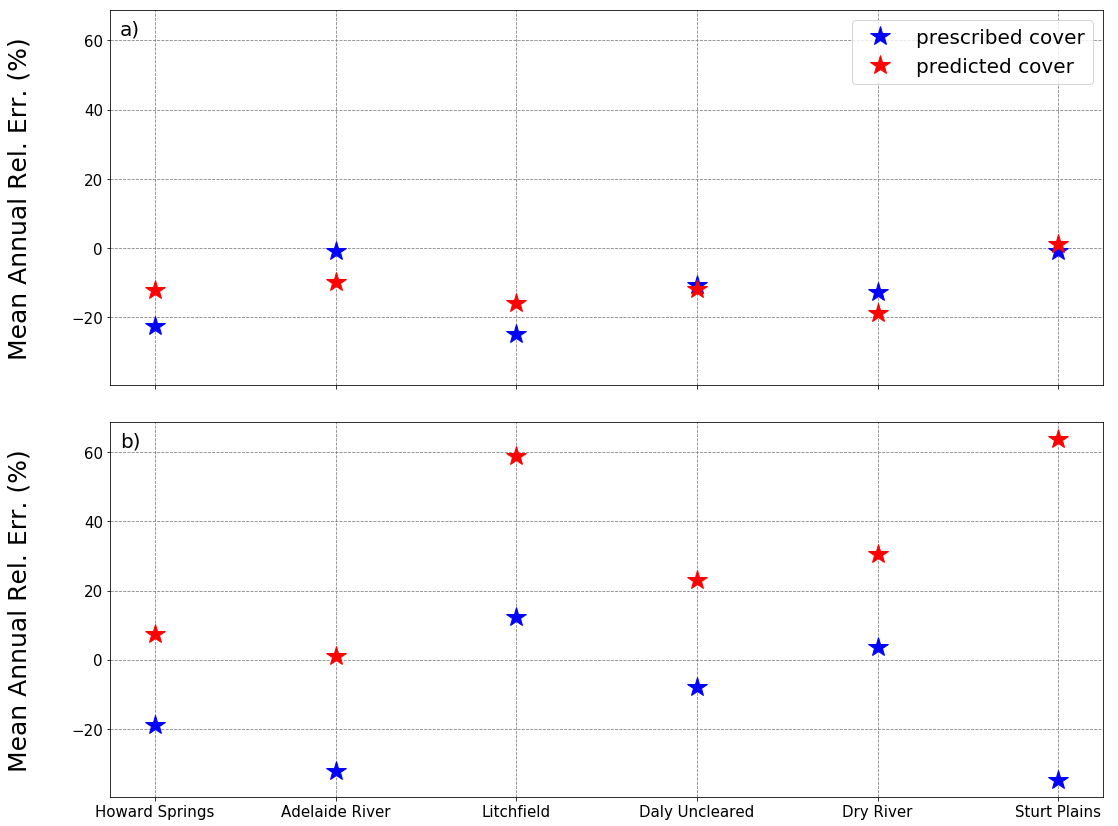

In [25]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]
site_names = ["Howard Springs", "Adelaide River", "Litchfield", "Daly Uncleared", "Dry River", "Sturt Plains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), sharex=True, sharey=True)   


i = 0

skipped = 0
i_basin = 0
add_labels = 1

#loop over all sites
for site in study_sites:
    

    try:
        pc_ebest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
         site +  "/sce_stats_best/evap_beststats.txt") 

        pc_assbest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
         site +  "/sce_stats_best/ass_beststats.txt")              

        ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff1.0/sce_stats_best/evap_beststats.txt") #mm/d

        assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff1.0/sce_stats_best/ass_beststats.txt") #mm/d          
        
        if(add_labels  == 1):
            ax[0].plot(i_basin, pc_ebest_stats[1]*100, '*b', markersize=20, label="prescribed cover" ) 
            ax[1].plot(i_basin, pc_assbest_stats[1]*100, '*b', markersize=20, label="prescribed cover" ) 
            ax[0].plot(i_basin, ebest_stats[1]*100, '*r', markersize=20, label="predicted cover" ) 
            ax[1].plot(i_basin, assbest_stats[1]*100, '*r', markersize=20, label="predicted" )
            add_labels = 0            
        else:
            ax[0].plot(i_basin, pc_ebest_stats[1]*100, '*b', markersize=20 ) 
            ax[1].plot(i_basin, pc_assbest_stats[1]*100, '*b', markersize=20 ) 
            ax[0].plot(i_basin, ebest_stats[1]*100, '*r', markersize=20 ) 
            ax[1].plot(i_basin, assbest_stats[1]*100, '*r', markersize=20) 

    except IOError:
        skipped = skipped + 1 
        #print("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
        #site +  "/sce_stats_best/ass_beststats.txt")
       
        
        
    i_basin = i_basin + 1        

  
    ax[0].grid(b=True, which='major', color='grey', linestyle='--')
    ax[1].grid(b=True, which='major', color='grey', linestyle='--')

    for tick in ax[0].xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax[0].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
        
    for tick in ax[1].xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax[1].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)        
        
        
ax[0].set_xticks( [0,1,2,3,4,5] )  
ax[0].set_xticklabels( site_names ) 
ax[0].legend(fontsize = 20)
ax[0].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)
ax[0].text(0.01, 0.95, "a)", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)

ax[1].set_xticks( [0,1,2,3,4,5] )  
ax[1].set_xticklabels( site_names ) 
#ax[1].legend(fontsize = 20, loc="center left")
ax[1].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)
ax[1].text(0.01, 0.95, "b)", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)


plt.tight_layout()
plt.show()

    


**Figure S4.11.** The relative errors between the mean annual fluxes for a) evaporation and b) assimilation, with prescribed cover in blue and predicted cover in red. Similar results as the timeseries in Figures S4.2 and S4.6, it can be noted that there are hardly any difference for evaporation, but for assimilation the relative error moves towards more negative values (i.e. total assimilation is always lower). 